# Experimental Procedure 

Begin by using your computer software to create 100 samples each of size 20 from the C+E model $Y =\mu + \epsilon$, with $\epsilon \sim N(0,\sigma^{2})$, for your choice of $\mu$ and $\sigma^{2}$. For each sample, calculate a level 0.95 confidence interval for $\mu$.

 - Count the number of intervals that do not contain μ. How does this number compare with what you expect from the confidence level 0.95?
 - Record the mean width of the intervals.

## The Confidence Intervals for the Means
*Note*: The formula for a *$100(1 - \alpha)$* confidence interval estimate of the mean is as follows:

$(\bar{x} - z_{\alpha/2}\frac{\sigma}{\sqrt{n}}, \ \ \bar{x} + z_{\alpha/2}\frac{\sigma}{\sqrt{n}})$

Where *$\bar{x}$* denotes the observed value of the sample mean.

In [246]:
# Chosen values for mu, sigma and alpha
mu = 5
sigma = 10
alpha = .05

In [247]:
construct_cis = function (n_samples, n) {
    std = sigma / sqrt(n)
    mx = matrix(rep(NA, n_samples * n), ncol=n)
    
    cis_l = cis_u = rep(NA, n_samples)
    x_bars = rep(NA, n_samples)

    for (i in 1:n_samples) {
        mx[i,] = rnorm(n, mean=mu, sd=sigma)
        
        x_bar = mean(mx[i,])
        x_bars[i] = x_bar

        z_a2 = qnorm(alpha/2, 0, 1, lower.tail=F)
        cis_l[i] = x_bar - z_a2 * std
        cis_u[i] = x_bar + z_a2 * std
    }
    
    return(data.frame(x_bars=x_bars, cis_l=cis_l, cis_u=cis_u))
}

n = 20 # sample size
n_samples = 100 # number of samples or experiments (trials)

output = construct_cis(n_samples, n)
head(output)

x_bars   cis_l     cis_u    
1 5.562789  1.180176  9.945402
2 3.256469 -1.126144  7.639082
3 6.190688  1.808076 10.573301
4 7.288717  2.906105 11.671330
5 2.726501 -1.656111  7.109114
6 2.328447 -2.054165  6.711060

## CI Plot 

Quick Summary:
- No. of intervels NOT containing mu: 7 
- Proportion of times the CI containing mu: 0.93 
-------


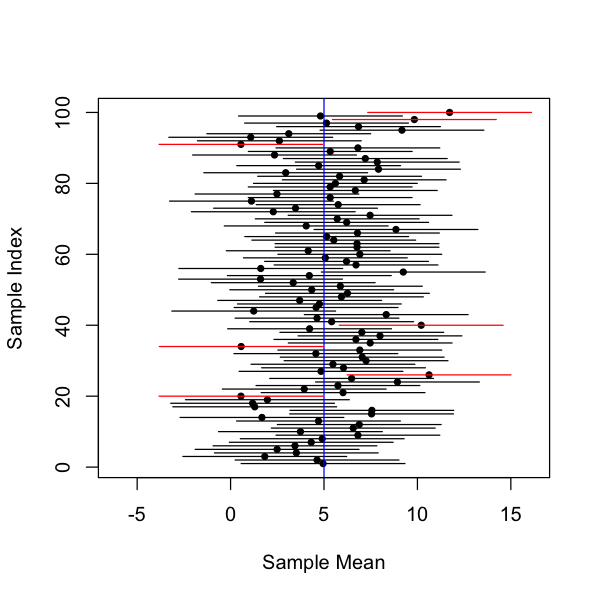

In [397]:
library(dplyr)
# options_org = options()
options(repr.plot.width=5, repr.plot.height=5)


plot_intervals = function(output) {
    # number of intervals do not contain mu
    count = 0
    x_bars = output$x_bars
    cis_l = output$cis_l
    cis_u = output$cis_u

    n_samples = length(x_bars)
    
    std = sigma / sqrt(n)
    
    plot(x_bars, 1:n_samples, pch=20, xlim=c(mu - 5*std, mu + 5*std), xlab='Sample Mean', ylab='Sample Index')

    for (i in 1:n_samples) {
        col = 'black'
        if ( ! between(mu, cis_l[i], cis_u[i]) ) {
            count = count+1
            col = 'red'
        }

        segments(cis_l[i], i, cis_u[i], i, col=col)
    }

    abline(v=mu, col='blue')
    cat('Quick Summary:\n- No. of intervels NOT containing mu:', count, '\n')
    cat('- Proportion of times the CI containing mu:', (n_samples - count)/n_samples, '\n-------\n')
}

n = 20
n_samples = 100

plot_intervals(construct_cis(n_samples, n))

### Case 0: Sample Size: 1, Number of Samples: 100

Quick Summary:
- No. of intervels NOT containing mu: 2 
- Proportion of times the CI containing mu: 0.8 
-------
Quick Summary:
- No. of intervels NOT containing mu: 0 
- Proportion of times the CI containing mu: 1 
-------
Quick Summary:
- No. of intervels NOT containing mu: 2 
- Proportion of times the CI containing mu: 0.8 
-------
Quick Summary:
- No. of intervels NOT containing mu: 0 
- Proportion of times the CI containing mu: 1 
-------


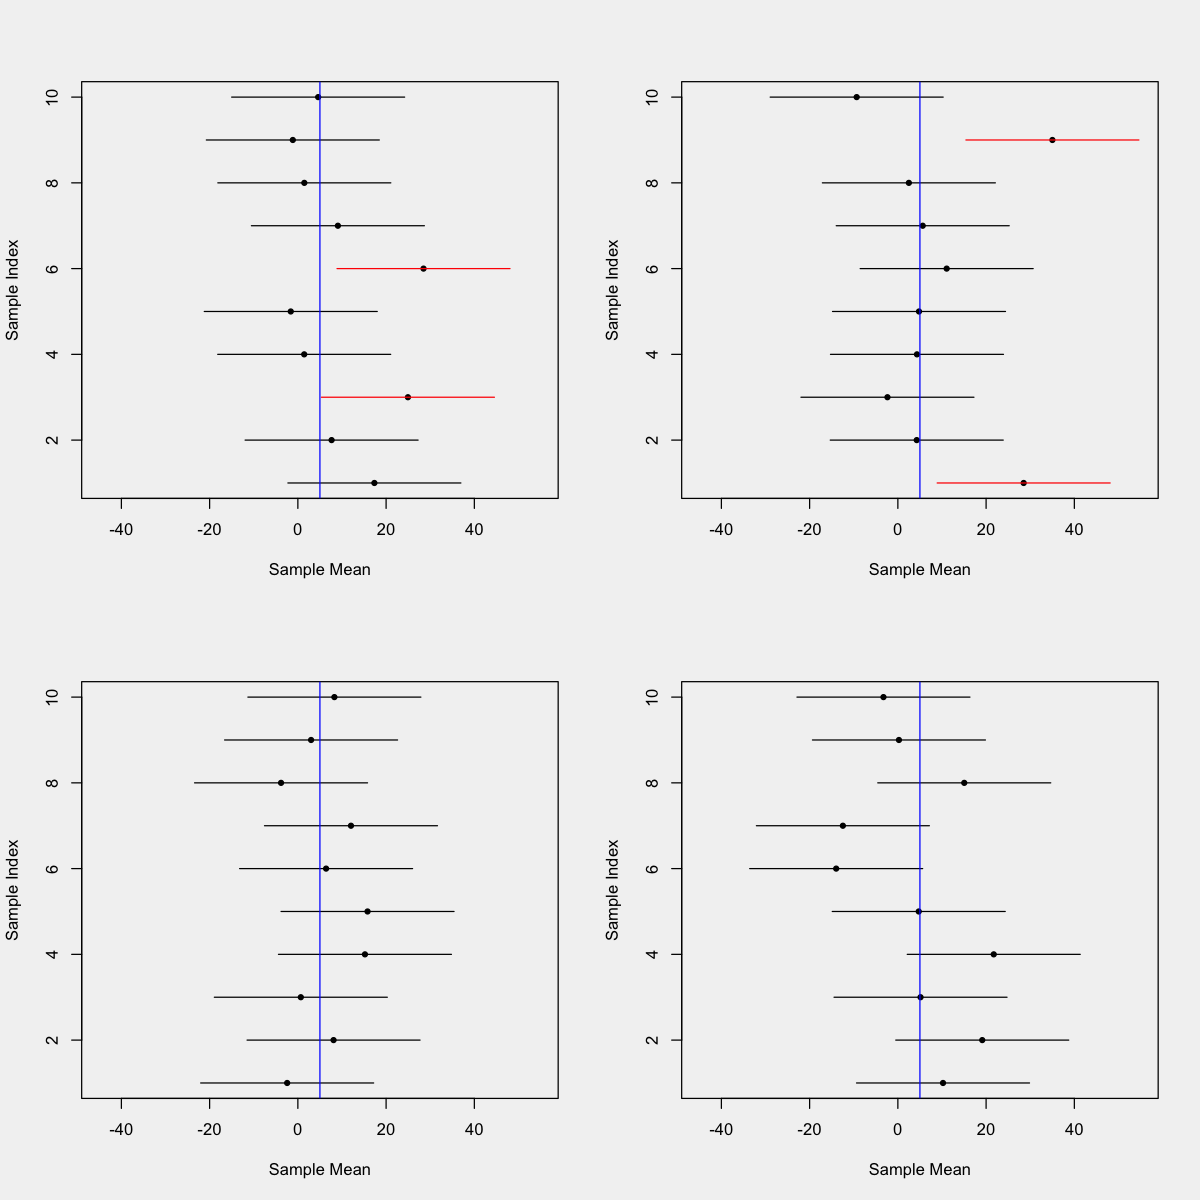

In [398]:
n = 1
n_samples = 10

options(repr.plot.width=10, repr.plot.height=10)
par(mfrow=c(1,2), bg='gray95')
layout(mat = matrix(c(1, 2, 3, 4), nrow = 2, ncol = 2),heights = c(15, 15), widths = c(10, 10))


for (j in 1:4) {
    plot_intervals(construct_cis(n_samples, n))
}

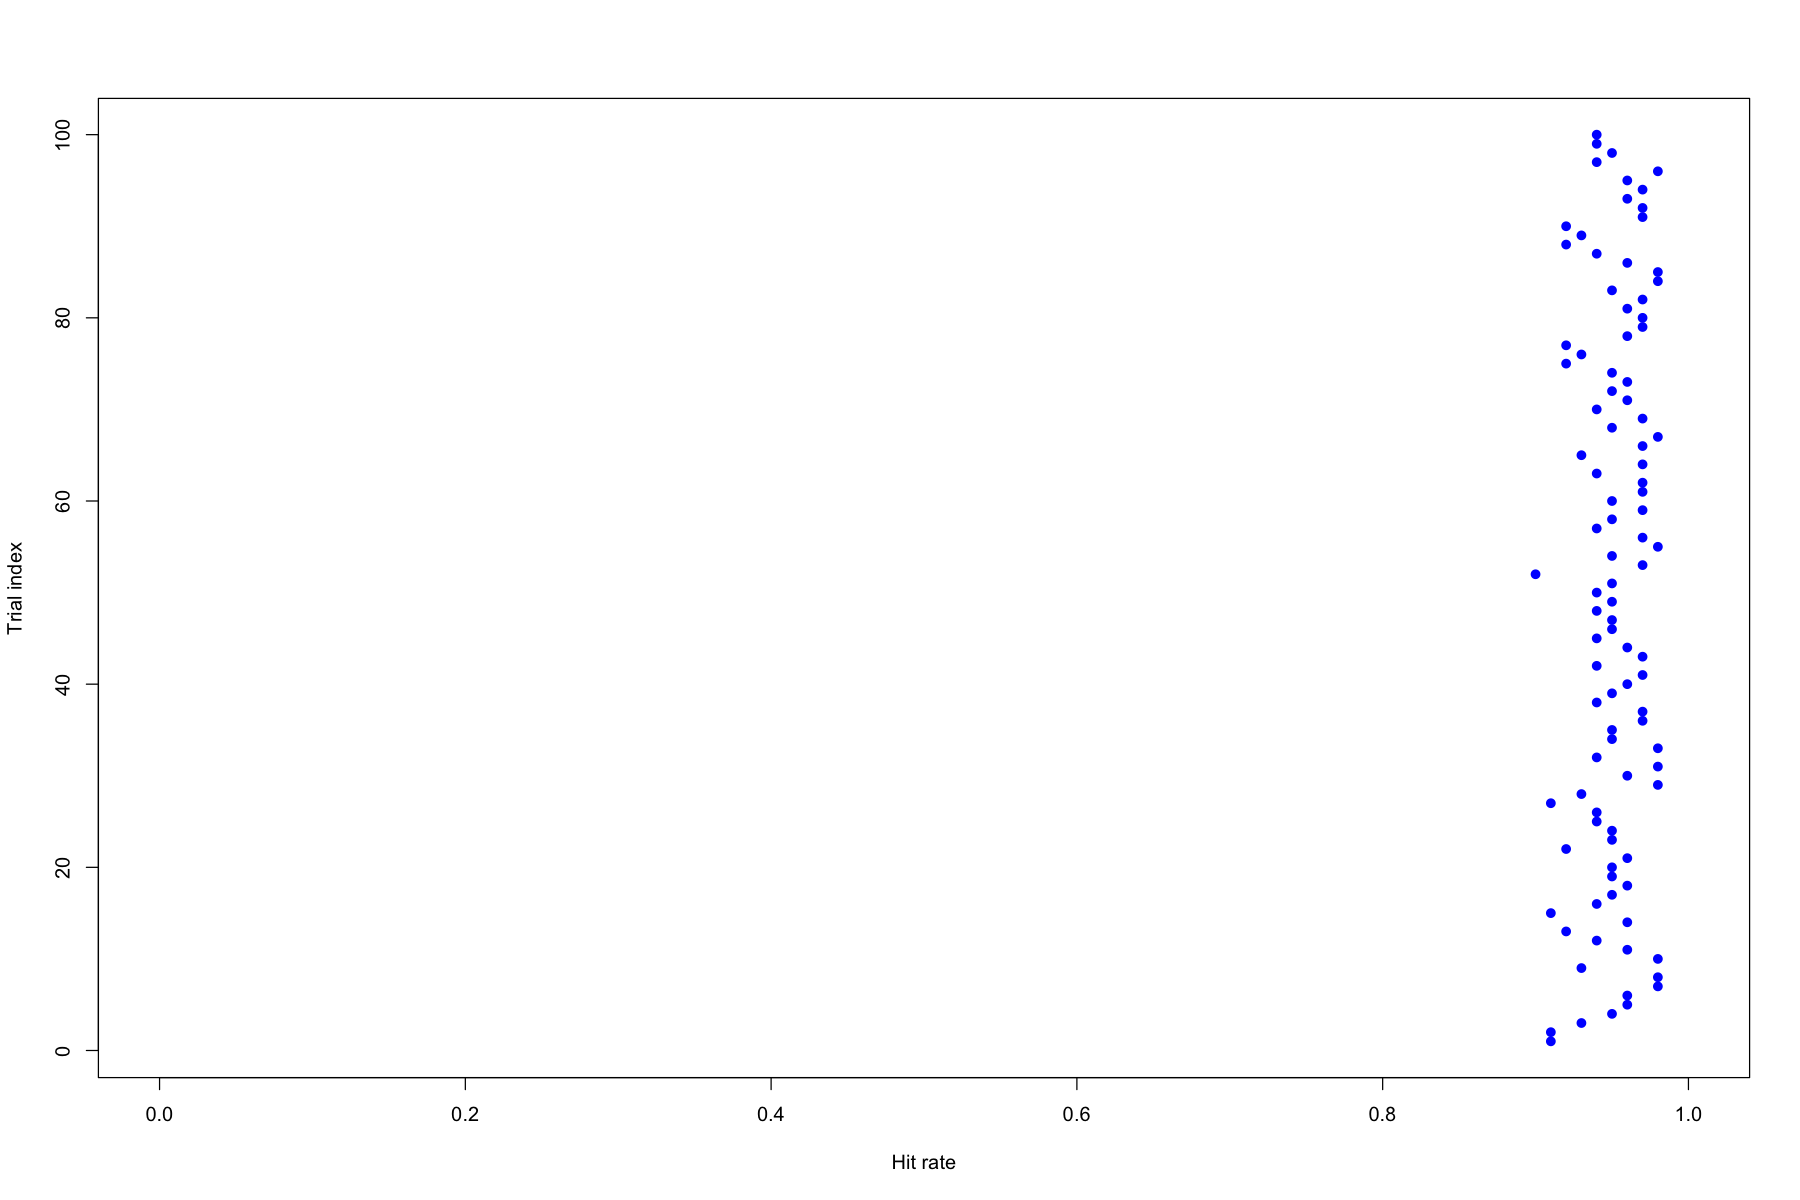

In [404]:
# Repeate the previous experiment 100 times and record to rate at which the confidence interval contains mu
n_repeats = 100
rates = rep(NA, n_repeats)

n = 1
n_samples = 100

for (i in 1:n_repeats) {
    count = 0
    output = construct_cis(n_samples, n)
    cis_l = output$cis_l
    cis_u = output$cis_u
    
    for (j in 1:n_samples) {
        if ( ! between(mu, cis_l[j], cis_u[j]) ) {
            count = count + 1
        }
    }
    rates[i] = (n_samples - count)/n_samples
}

options(repr.plot.width=15, repr.plot.height=10)
plot(rates, 1:length(rates), xlim=c(0, 1), pch=20, col='blue', lwd=3, xlab='Hit rate', ylab='Trial index')

### Case 1: Sample Size: 10, Number of Samples: 1

*Note*: Repeat this experiment a dozen of times until the percentage of the CI containing $\mu$ equal to 1.

Quick Summary:
- No. of intervels NOT containing mu: 0 
- Proportion of times the CI containing mu: 1 
-------
Quick Summary:
- No. of intervels NOT containing mu: 0 
- Proportion of times the CI containing mu: 1 
-------
Quick Summary:
- No. of intervels NOT containing mu: 0 
- Proportion of times the CI containing mu: 1 
-------
Quick Summary:
- No. of intervels NOT containing mu: 0 
- Proportion of times the CI containing mu: 1 
-------


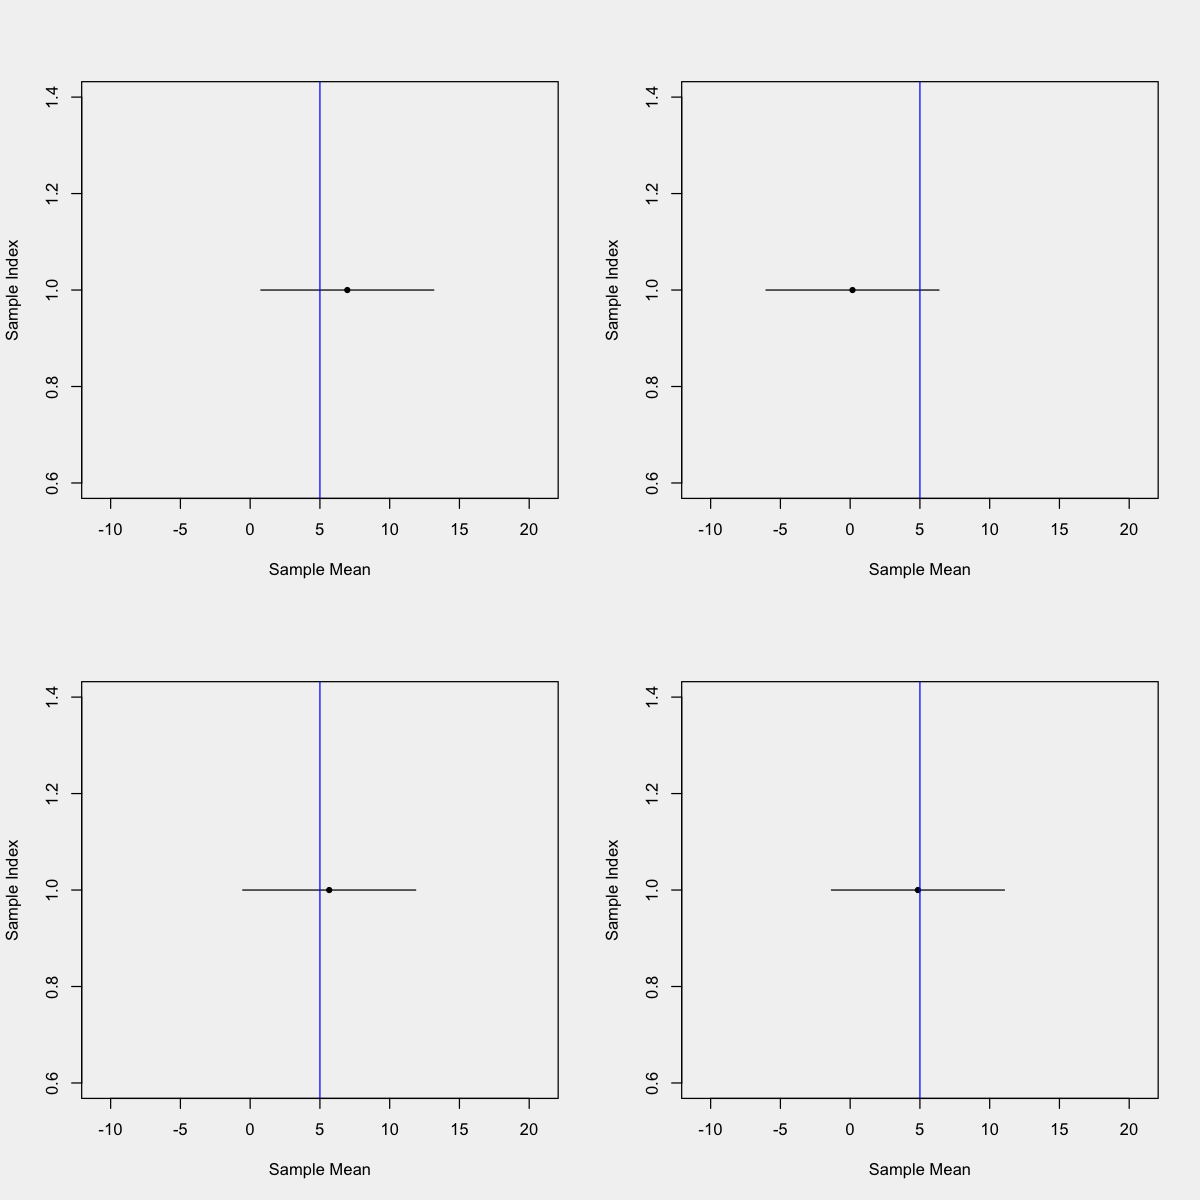

In [405]:
n = 10
n_samples = 1

options(repr.plot.width=10, repr.plot.height=10)
par(mfrow=c(1,2), bg='gray95')
layout(mat = matrix(c(1, 2, 3, 4), nrow = 2, ncol = 2),heights = c(15, 15), widths = c(10, 10))


for (j in 1:4) {
    plot_intervals(construct_cis(n_samples, n))
}

### Small Number of Trials: 10
Run the following cell dozens of times and observe the variation in proportion of misses to hits.

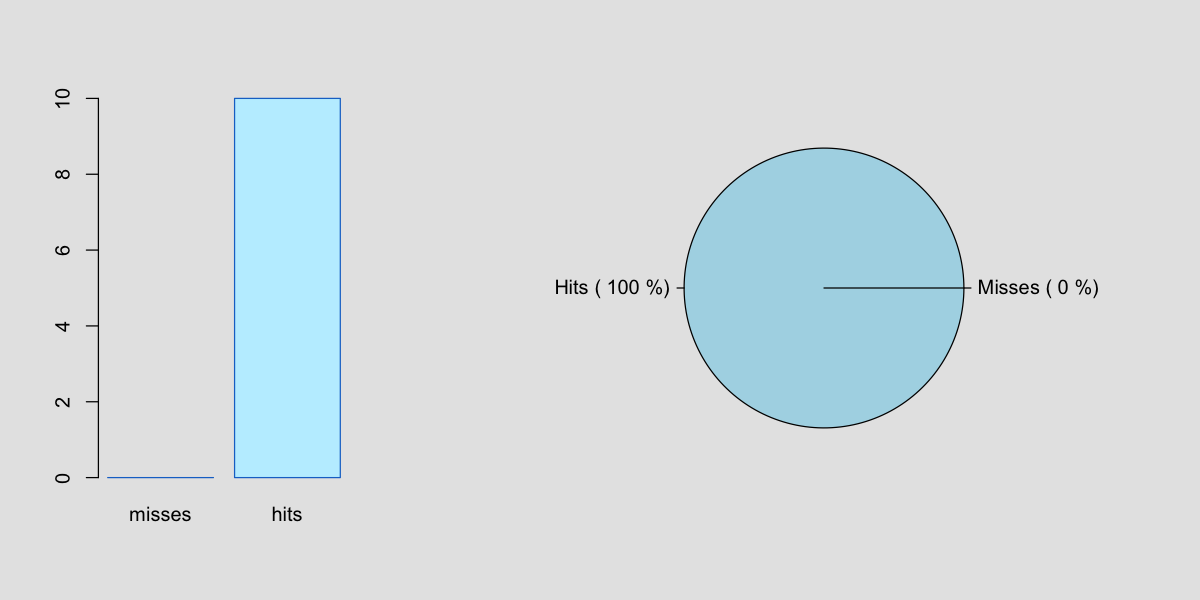

In [426]:
n = 10
n_samples = 1
n_repeats = 10

contains = rep(0, n_repeats)

misses_hits = c(0, 0)

for (i in 1:n_repeats) {
    output = construct_cis(n_samples, n)
    cis_l = output$cis_l
    cis_u = output$cis_u
    
    for (j in 1:n_samples) {
        if (between(mu, cis_l[j], cis_u[j]) ) {
            misses_hits[2] = misses_hits[2] + 1
        } else {
            misses_hits[1] = misses_hits[1] + 1
        }
    }
}


options(repr.plot.width=10, repr.plot.height=5)

par(mfrow=c(1,2), bg='gray90')
layout(mat = matrix(c(1, 2, 3, 4), nrow = 1, ncol = 2),heights = c(1), widths = c(10, 20))
barplot(misses_hits, ylim=c(0, n_repeats), names.arg=c('misses', 'hits'), col="lightblue1", border="dodgerblue3" )
rmiss = round(misses_hits[1] / (misses_hits[1] + misses_hits[2]), digits=4)
rhit = 1 - rmiss
pie(misses_hits, labels = c(paste('Misses (', rmiss*100, '%)'), paste('Hits (', rhit*100, '%)')), radius=1.2)

### Large Number of Trials: 1500
The proportion varies slightly and is more stable than the results from the previous cell.

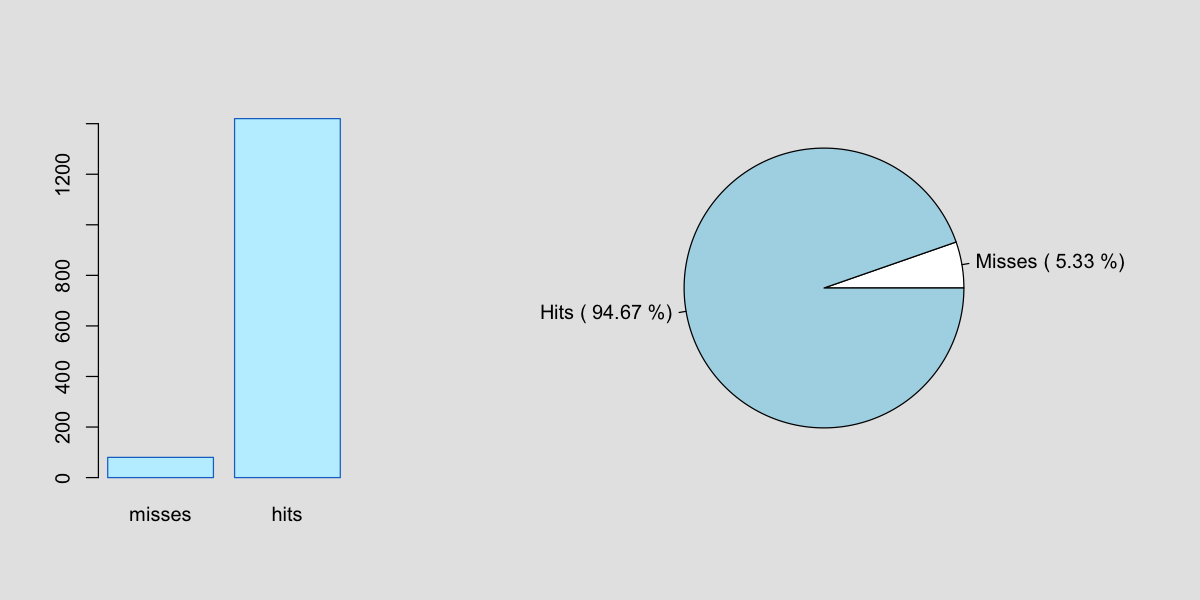

In [428]:
n = 10
n_samples = 1
n_repeats = 1500

contains = rep(0, n_repeats)

misses_hits = c(0, 0)

for (i in 1:n_repeats) {
    count = 0
    output = construct_cis(n_samples, n)
    cis_l = output$cis_l
    cis_u = output$cis_u
    
    for (j in 1:n_samples) {
        if (between(mu, cis_l[j], cis_u[j]) ) {
            misses_hits[2] = misses_hits[2] + 1
        } else {
            misses_hits[1] = misses_hits[1] + 1
        }
    }
}


options(repr.plot.width=10, repr.plot.height=5)

par(mfrow=c(1,2), bg='gray90')
layout(mat = matrix(c(1, 2, 3, 4), nrow = 1, ncol = 2),heights = c(1), widths = c(10, 20))

barplot(misses_hits, ylim=c(0, n_repeats), names.arg=c('misses', 'hits'), col="lightblue1", border="dodgerblue3" )
rmiss = round(misses_hits[1] / (misses_hits[1] + misses_hits[2]), digits=4)
rhit = 1 - rmiss
pie(misses_hits, labels = c(paste('Misses (', rmiss*100, '%)'), paste('Hits (', rhit*100, '%)')), radius=1.2)

### Case 2: Sample Size: 10, Number of Samples: 10

Quick Summary:
- No. of intervels NOT containing mu: 0 
- Proportion of times the CI containing mu: 1 
-------
Quick Summary:
- No. of intervels NOT containing mu: 0 
- Proportion of times the CI containing mu: 1 
-------
Quick Summary:
- No. of intervels NOT containing mu: 0 
- Proportion of times the CI containing mu: 1 
-------
Quick Summary:
- No. of intervels NOT containing mu: 0 
- Proportion of times the CI containing mu: 1 
-------


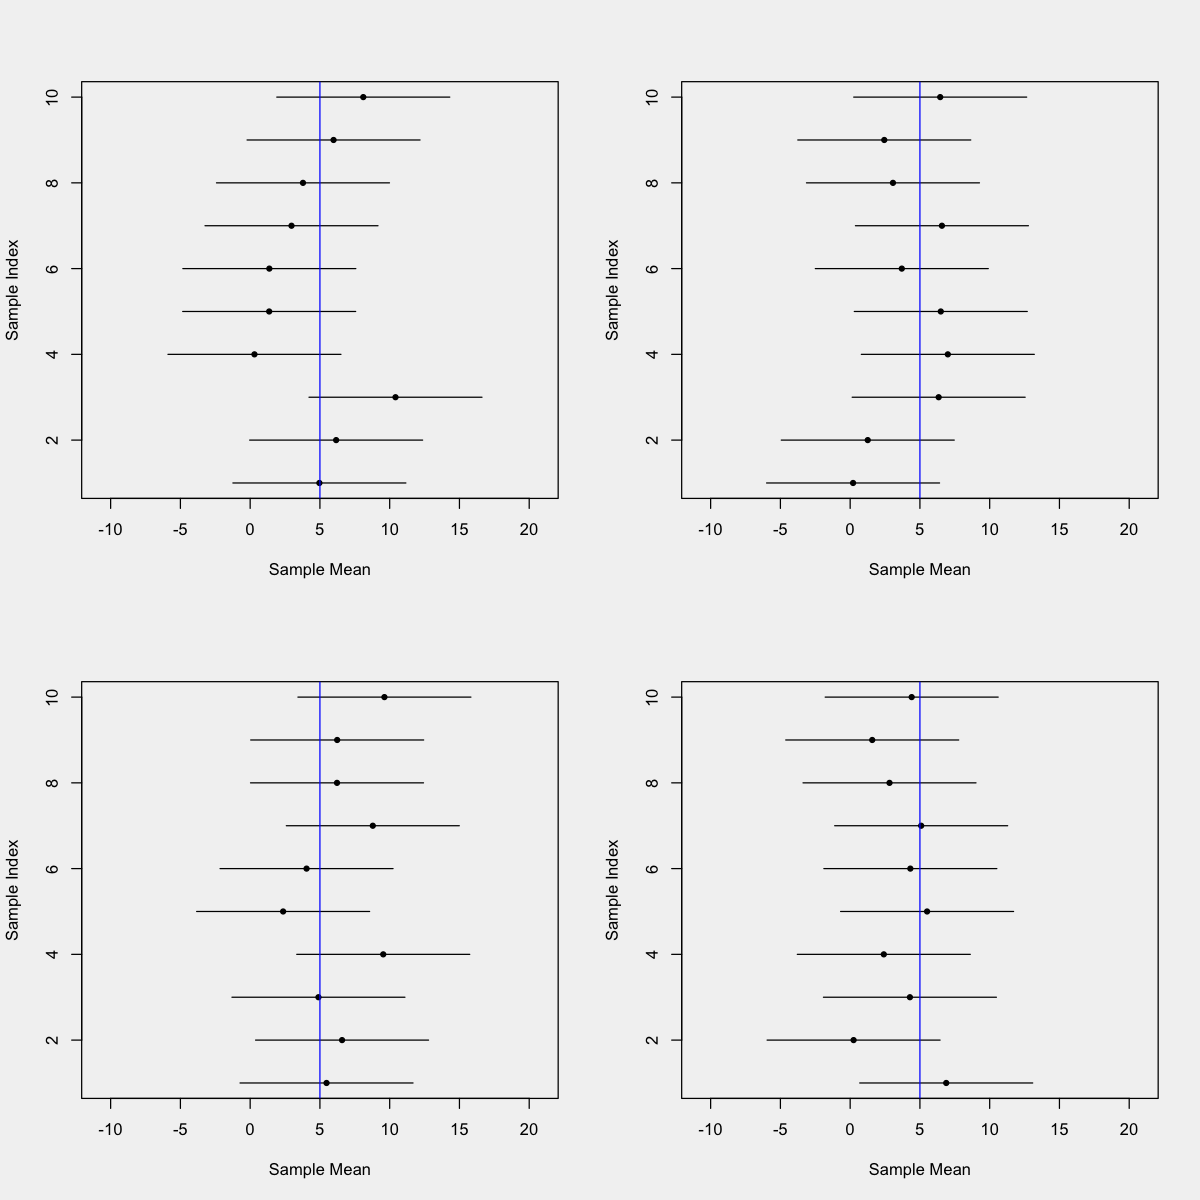

In [429]:
n = 10
n_samples = 10

options(repr.plot.width=10, repr.plot.height=10)
par(mfrow=c(1,2), bg='gray95')
layout(mat = matrix(c(1, 2, 3, 4), nrow = 2, ncol = 2),heights = c(15, 15), widths = c(10, 10))


for (j in 1:4) {
    plot_intervals(construct_cis(n_samples, n))
}

### Case 3: Sample Size: 10, Number of Samples: 100

Quick Summary:
- No. of intervels NOT containing mu: 1 
- Proportion of times the CI containing mu: 0.99 
-------
Quick Summary:
- No. of intervels NOT containing mu: 5 
- Proportion of times the CI containing mu: 0.95 
-------
Quick Summary:
- No. of intervels NOT containing mu: 3 
- Proportion of times the CI containing mu: 0.97 
-------
Quick Summary:
- No. of intervels NOT containing mu: 4 
- Proportion of times the CI containing mu: 0.96 
-------


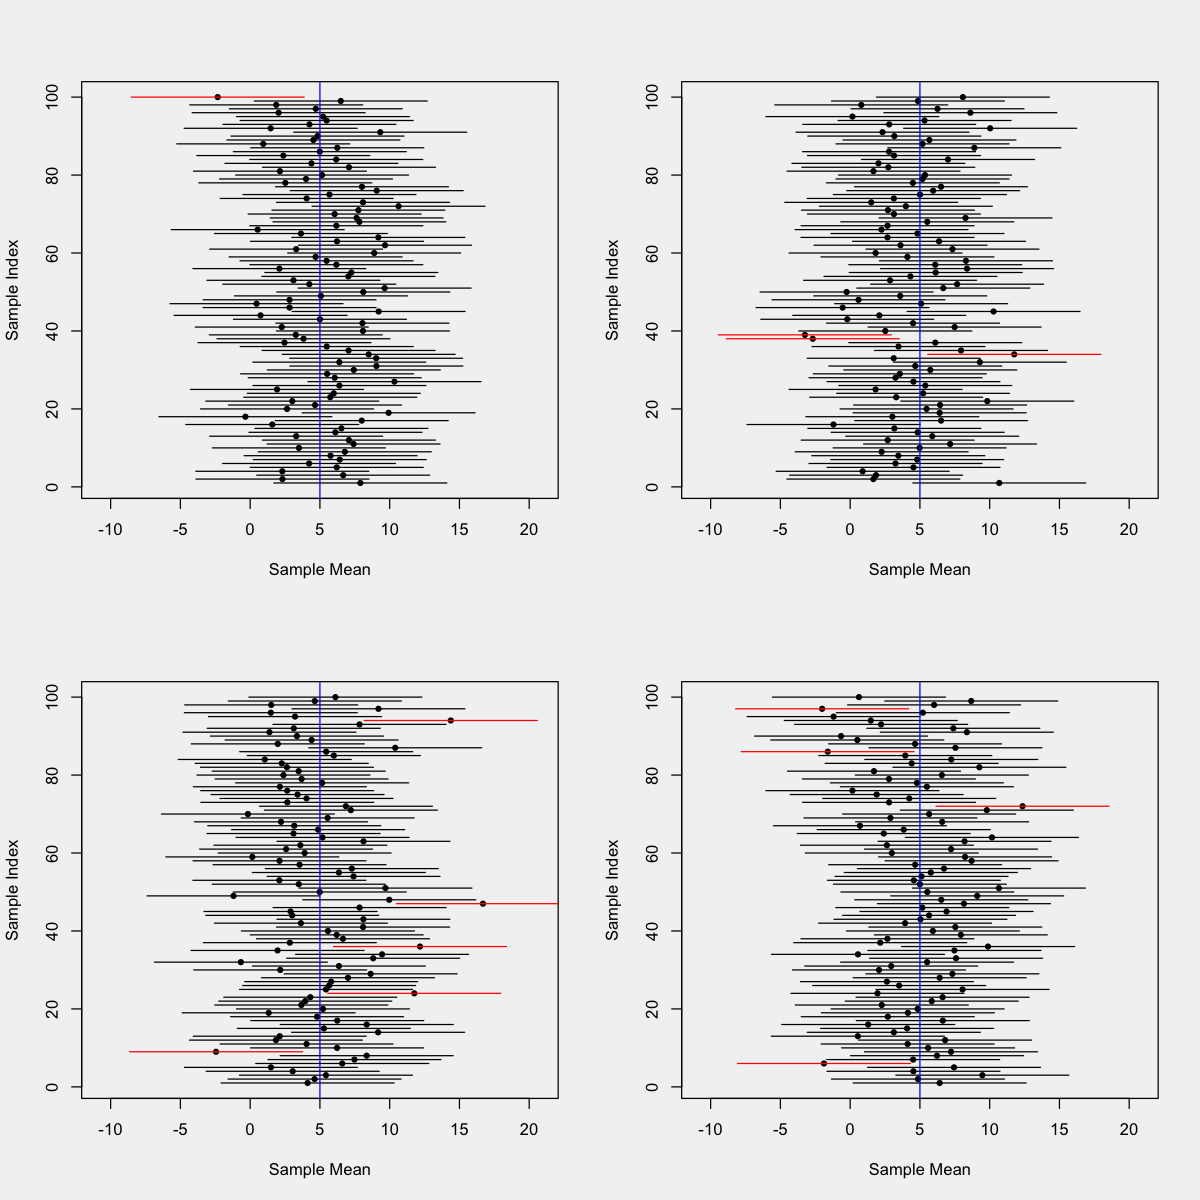

In [430]:
n = 10
n_samples = 100

options(repr.plot.width=10, repr.plot.height=10)
par(mfrow=c(1,2), bg='gray95')
layout(mat = matrix(c(1, 2, 3, 4), nrow = 2, ncol = 2),heights = c(15, 15), widths = c(10, 10))


for (j in 1:4) {
    plot_intervals(construct_cis(n_samples, n))
}

### Case 4: Sample Size: 30, Number of Samples: 100

Quick Summary:
- No. of intervels NOT containing mu: 4 
- Proportion of times the CI containing mu: 0.96 
-------
Quick Summary:
- No. of intervels NOT containing mu: 6 
- Proportion of times the CI containing mu: 0.94 
-------
Quick Summary:
- No. of intervels NOT containing mu: 5 
- Proportion of times the CI containing mu: 0.95 
-------
Quick Summary:
- No. of intervels NOT containing mu: 4 
- Proportion of times the CI containing mu: 0.96 
-------


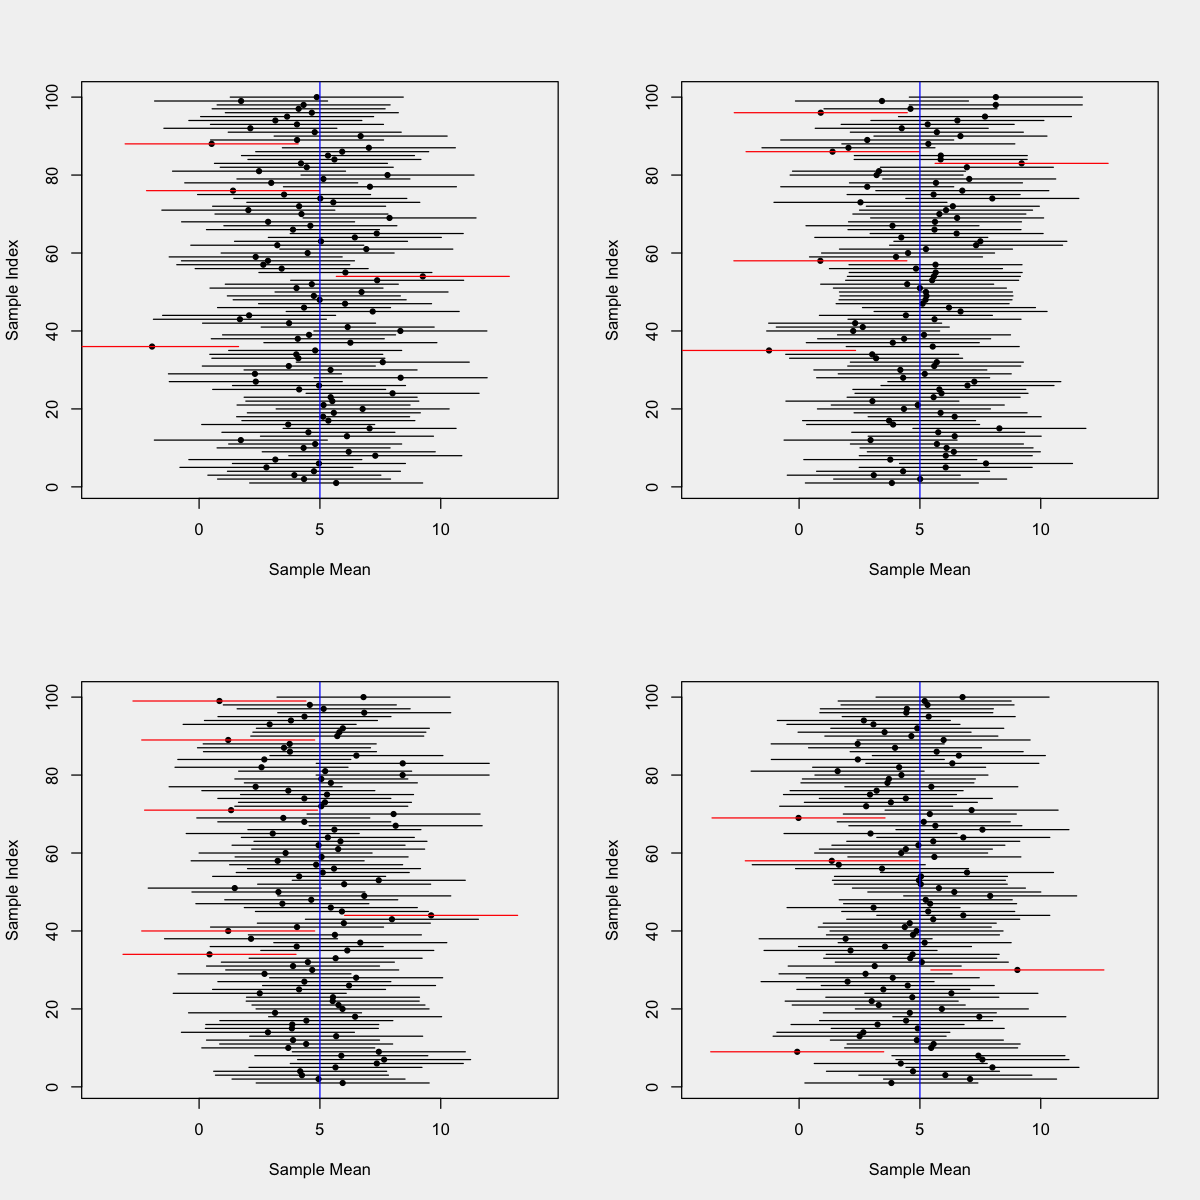

In [431]:
n = 30
n_samples = 100

options(repr.plot.width=10, repr.plot.height=10)
par(mfrow=c(1,2), bg='gray95')
layout(mat = matrix(c(1, 2, 3, 4), nrow = 2, ncol = 2),heights = c(15, 15), widths = c(10, 10))


for (j in 1:4) {
    plot_intervals(construct_cis(n_samples, n))
}

### Case 5: Sample Size: 50, Number of Samples: 100

Quick Summary:
- No. of intervels NOT containing mu: 2 
- Proportion of times the CI containing mu: 0.98 
-------
Quick Summary:
- No. of intervels NOT containing mu: 3 
- Proportion of times the CI containing mu: 0.97 
-------
Quick Summary:
- No. of intervels NOT containing mu: 3 
- Proportion of times the CI containing mu: 0.97 
-------
Quick Summary:
- No. of intervels NOT containing mu: 9 
- Proportion of times the CI containing mu: 0.91 
-------


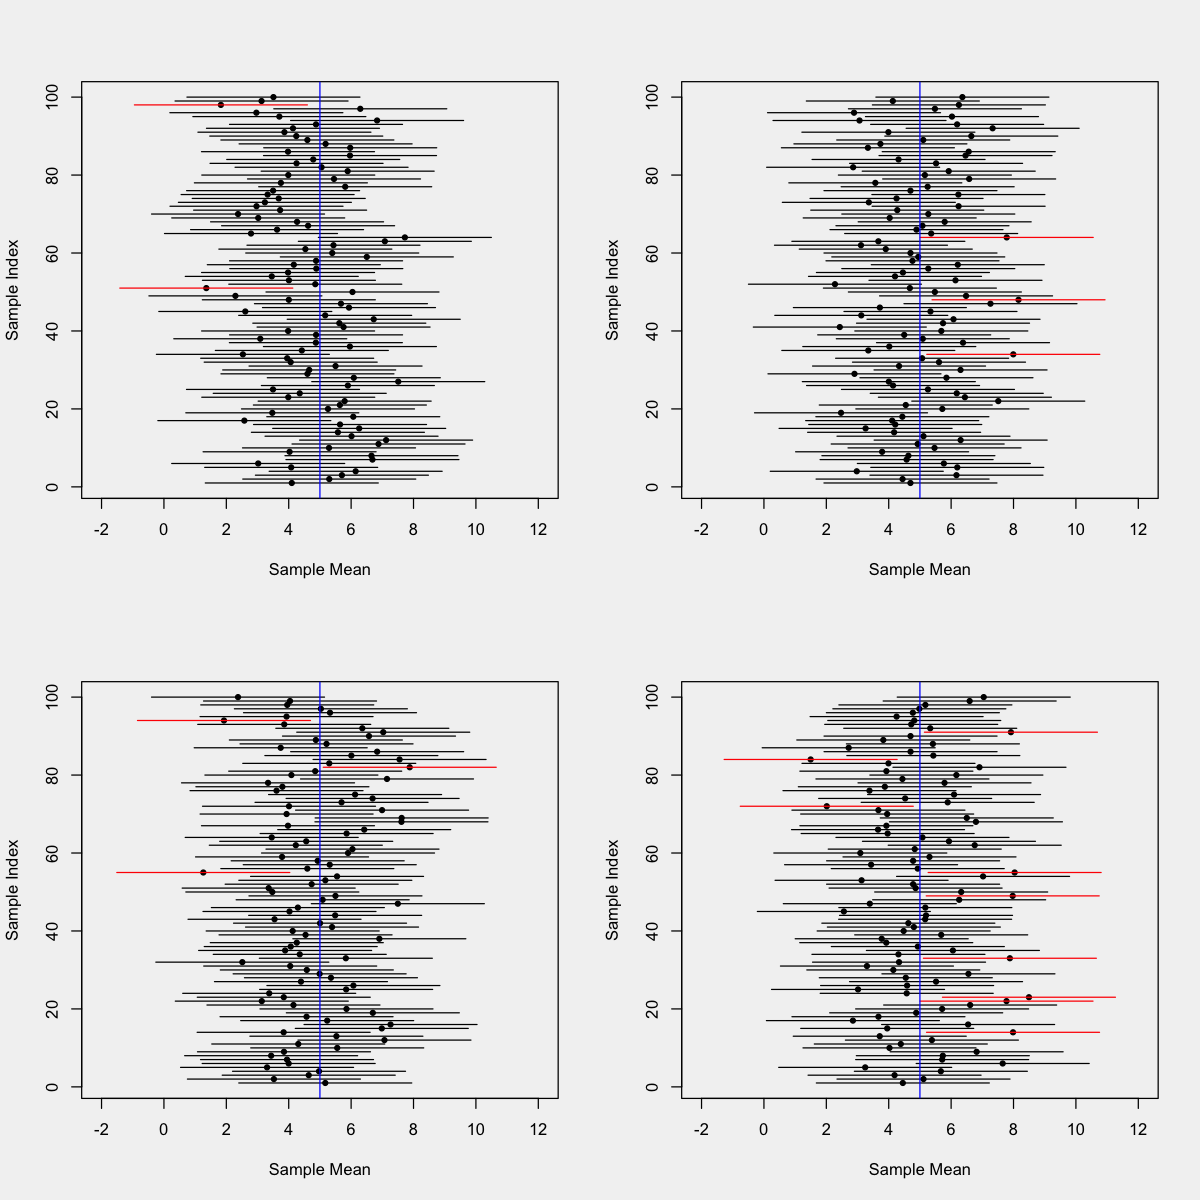

In [432]:
n = 50
n_samples = 100

options(repr.plot.width=10, repr.plot.height=10)
par(mfrow=c(1,2), bg='gray95')
layout(mat = matrix(c(1, 2, 3, 4), nrow = 2, ncol = 2),heights = c(15, 15), widths = c(10, 10))


for (j in 1:4) {
    plot_intervals(construct_cis(n_samples, n))
}

## Contaminated Distributions

- Model, Data: C+E model, $Y \sim \mu + c\epsilon_{1} + (1-c)\epsilon_{2}$.

In [440]:
mu = 3
sigma = 5

generate_contaminated_samples = function (n, n_samples, k) {
    my = matrix(rep(NA, n_samples*n), ncol=n)

    for (i in 1:n_samples) {
        y = rep(NA, n)
        
        eta = rexp(n, 1/sigma) - 1/sigma
        xi = rnorm(n, 0, sigma)
        b = rbinom(n, 1, k)
#         b = rep(0, n)

        for (j in 1:n) {
            if (b[j] == 0) {
                y[j] = mu + xi[j]
            } else {
                y[j] = mu + eta[j]
            }
        }
        
        my[i, ] = y
    }

    return(my)
}

cis_contaminated_dist = function (n, n_samples, k) {
    mx = matrix(generate_contaminated_samples(n, n_samples, k), ncol=n)
    cis_l = cis_u = rep(NA, n_samples)
    x_bars = rep(NA, n_samples)
    
    std = sigma / sqrt(n)

    for (i in 1:n_samples) {
        x_bar = mean(mx[i,])
        x_bars[i] = x_bar

        z_a2 = qnorm(alpha/2, 0, 1, lower.tail=F)
        cis_l[i] = x_bar - z_a2 * std
        cis_u[i] = x_bar + z_a2 * std
    }

    return(data.frame(x_bars=x_bars, cis_l=cis_l, cis_u=cis_u))
}

### Figure 1.1: n=1; s_samples=10; k=0

Quick Summary:
- No. of intervels NOT containing mu: 2 
- Proportion of times the CI containing mu: 0.8 
-------
Quick Summary:
- No. of intervels NOT containing mu: 0 
- Proportion of times the CI containing mu: 1 
-------
Quick Summary:
- No. of intervels NOT containing mu: 0 
- Proportion of times the CI containing mu: 1 
-------
Quick Summary:
- No. of intervels NOT containing mu: 0 
- Proportion of times the CI containing mu: 1 
-------


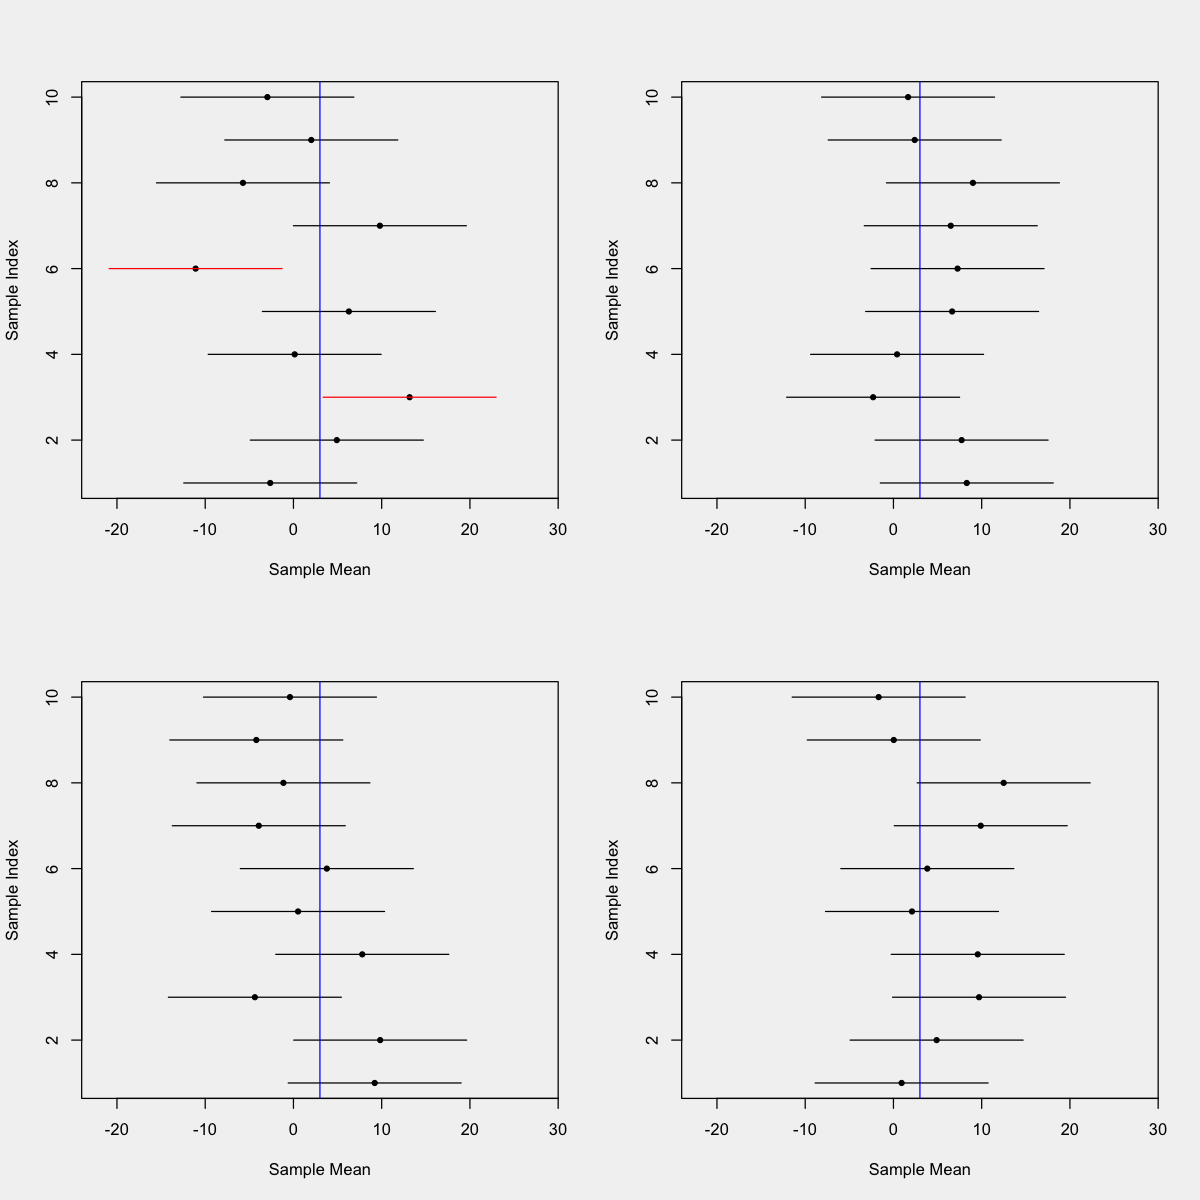

In [441]:
n = 1
n_samples = 10
k=0

options(repr.plot.width=10, repr.plot.height=10)
par(mfrow=c(1,2), bg='gray95')
layout(mat = matrix(c(1, 2, 3, 4), nrow = 2, ncol = 2),heights = c(15, 15), widths = c(10, 10))

for (j in 1:4) {
    plot_intervals(cis_contaminated_dist(n, n_samples, k))
}

### Figure 1.2: n=1; s_samples=10; k=0.1

Quick Summary:
- No. of intervels NOT containing mu: 0 
- Proportion of times the CI containing mu: 1 
-------
Quick Summary:
- No. of intervels NOT containing mu: 1 
- Proportion of times the CI containing mu: 0.9 
-------
Quick Summary:
- No. of intervels NOT containing mu: 3 
- Proportion of times the CI containing mu: 0.7 
-------
Quick Summary:
- No. of intervels NOT containing mu: 0 
- Proportion of times the CI containing mu: 1 
-------


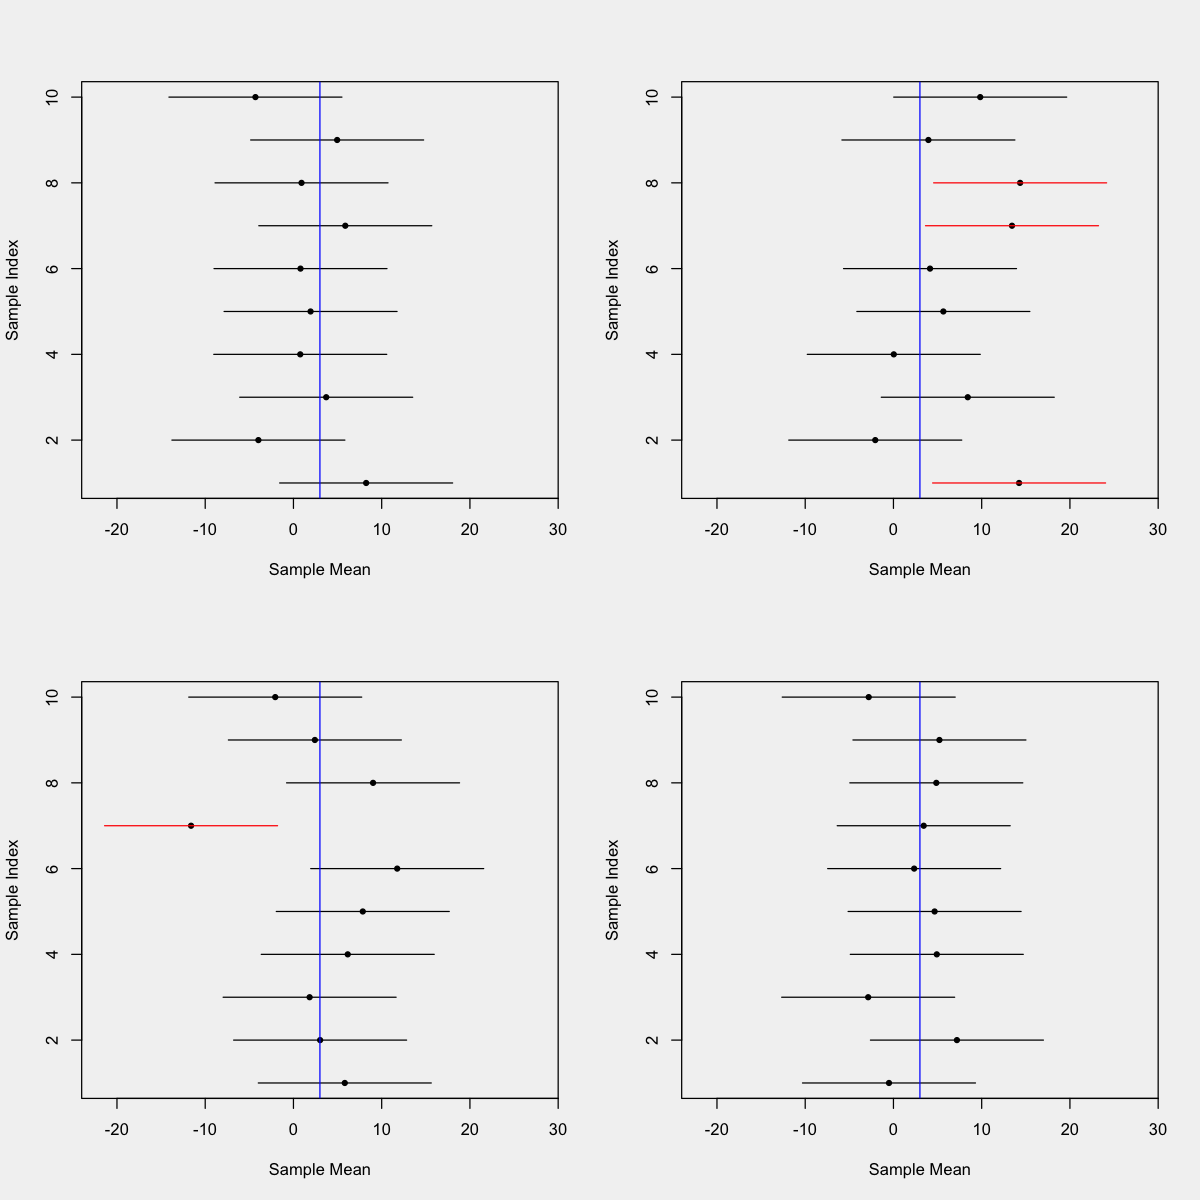

In [442]:
n = 1
n_samples = 10
k=.1

options(repr.plot.width=10, repr.plot.height=10)
par(mfrow=c(1,2), bg='gray95')
layout(mat = matrix(c(1, 2, 3, 4), nrow = 2, ncol = 2),heights = c(15, 15), widths = c(10, 10))

for (j in 1:4) {
    plot_intervals(cis_contaminated_dist(n, n_samples, k))
}

### Figure 1.3: n=1; s_samples=10; k=0.5

Quick Summary:
- No. of intervels NOT containing mu: 0 
- Proportion of times the CI containing mu: 1 
-------
Quick Summary:
- No. of intervels NOT containing mu: 3 
- Proportion of times the CI containing mu: 0.7 
-------
Quick Summary:
- No. of intervels NOT containing mu: 2 
- Proportion of times the CI containing mu: 0.8 
-------
Quick Summary:
- No. of intervels NOT containing mu: 0 
- Proportion of times the CI containing mu: 1 
-------


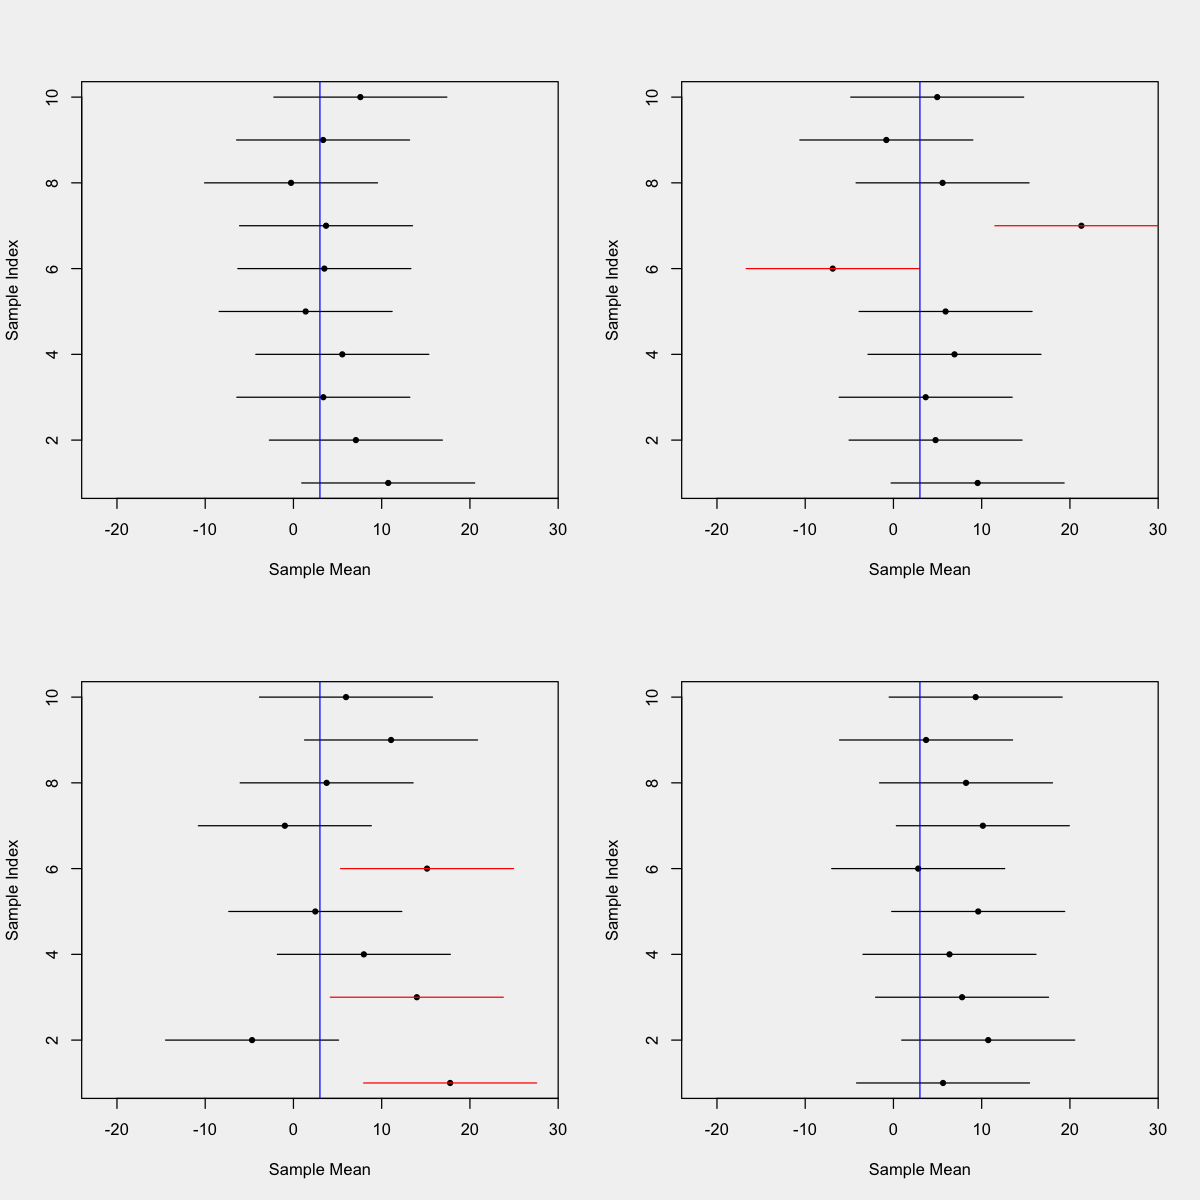

In [443]:
n = 1
n_samples = 10
k=.5

options(repr.plot.width=10, repr.plot.height=10)
par(mfrow=c(1,2), bg='gray95')
layout(mat = matrix(c(1, 2, 3, 4), nrow = 2, ncol = 2),heights = c(15, 15), widths = c(10, 10))

for (j in 1:4) {
    plot_intervals(cis_contaminated_dist(n, n_samples, k))
}

### Figure 1.4: n=1; s_samples=10; k=0.9

Quick Summary:
- No. of intervels NOT containing mu: 1 
- Proportion of times the CI containing mu: 0.9 
-------
Quick Summary:
- No. of intervels NOT containing mu: 1 
- Proportion of times the CI containing mu: 0.9 
-------
Quick Summary:
- No. of intervels NOT containing mu: 1 
- Proportion of times the CI containing mu: 0.9 
-------
Quick Summary:
- No. of intervels NOT containing mu: 0 
- Proportion of times the CI containing mu: 1 
-------


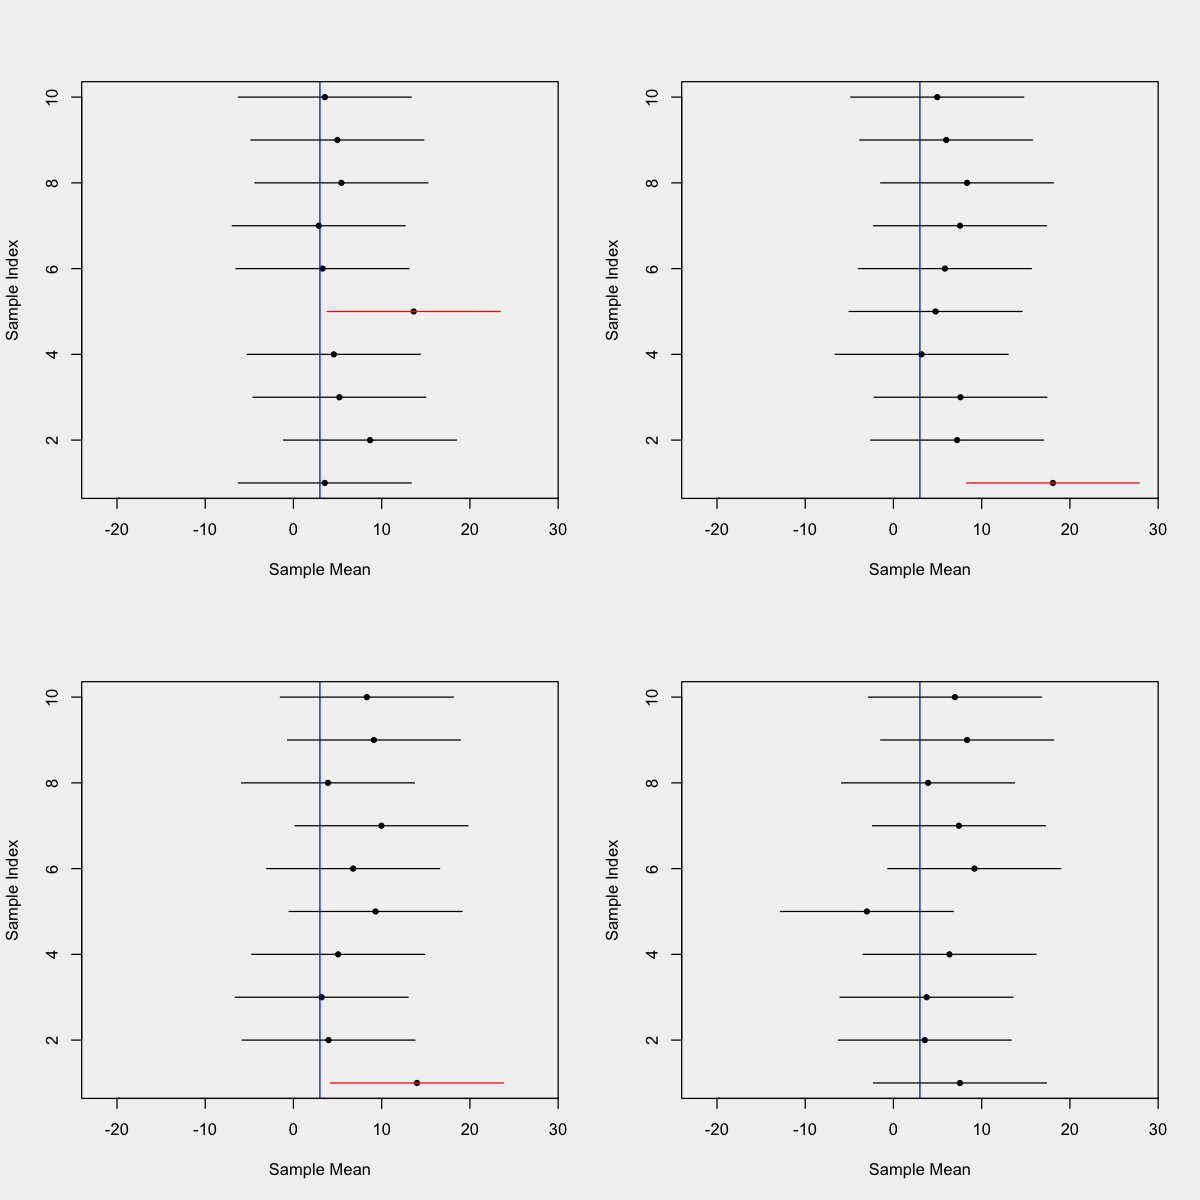

In [447]:
n = 1
n_samples = 10
k=.9

options(repr.plot.width=10, repr.plot.height=10)
par(mfrow=c(1,2), bg='gray95')
layout(mat = matrix(c(1, 2, 3, 4), nrow = 2, ncol = 2),heights = c(15, 15), widths = c(10, 10))

for (j in 1:4) {
    plot_intervals(cis_contaminated_dist(n, n_samples, k))
}

### Figure 2.1: n=1; s_samples=100; k=0

Quick Summary:
- No. of intervels NOT containing mu: 6 
- Proportion of times the CI containing mu: 0.94 
-------
Quick Summary:
- No. of intervels NOT containing mu: 4 
- Proportion of times the CI containing mu: 0.96 
-------
Quick Summary:
- No. of intervels NOT containing mu: 6 
- Proportion of times the CI containing mu: 0.94 
-------
Quick Summary:
- No. of intervels NOT containing mu: 5 
- Proportion of times the CI containing mu: 0.95 
-------


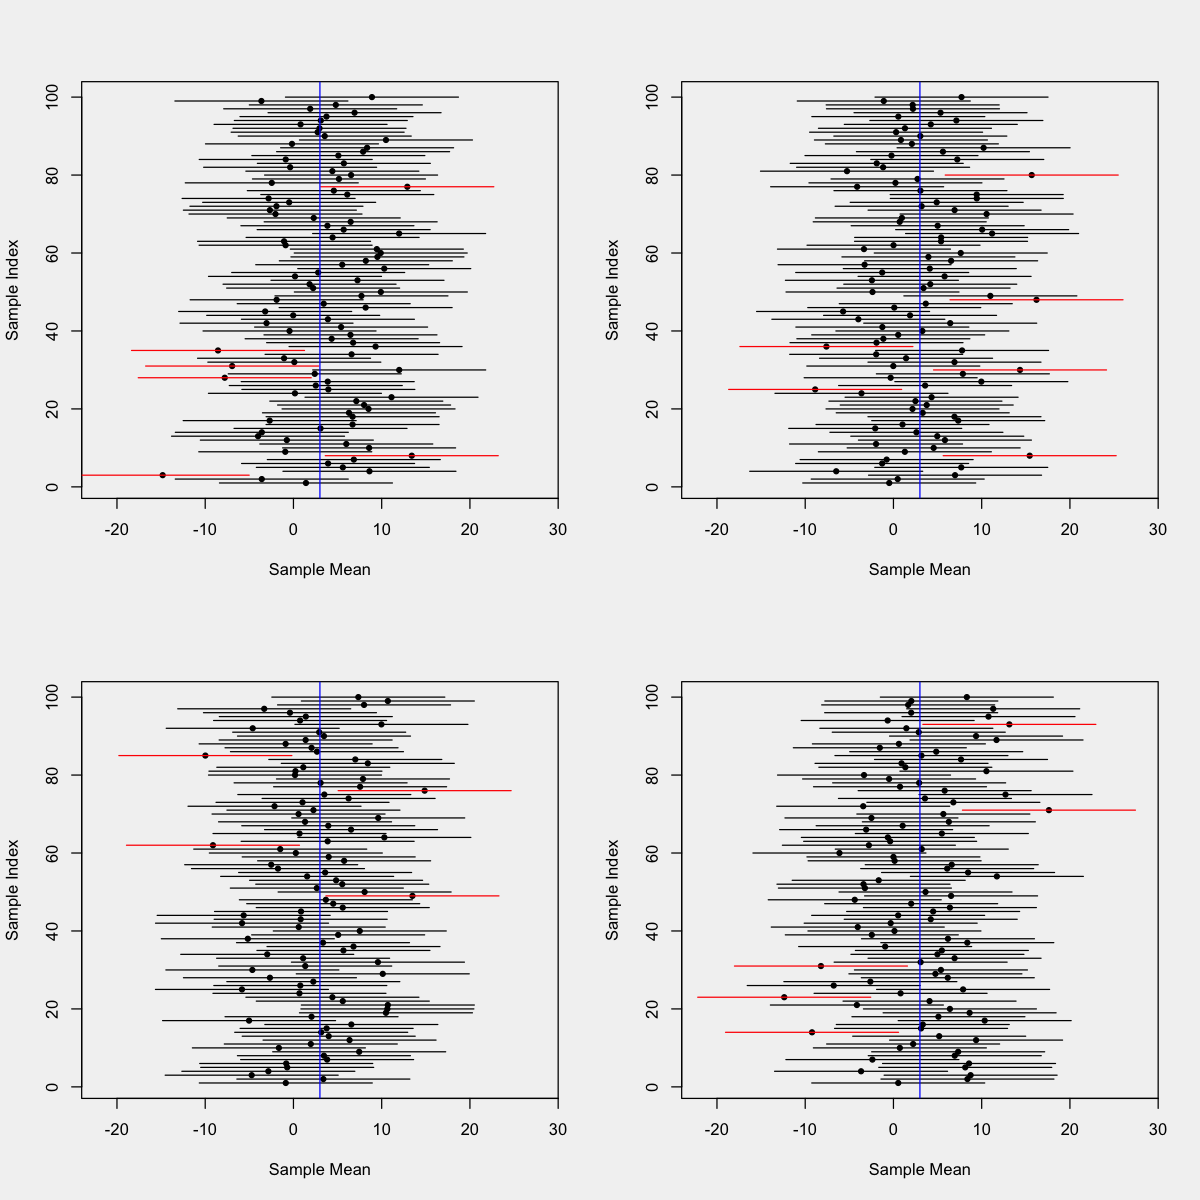

In [448]:
n = 1
n_samples = 100
k=0

options(repr.plot.width=10, repr.plot.height=10)
par(mfrow=c(1,2), bg='gray95')
layout(mat = matrix(c(1, 2, 3, 4), nrow = 2, ncol = 2),heights = c(15, 15), widths = c(10, 10))

for (j in 1:4) {
    plot_intervals(cis_contaminated_dist(n, n_samples, k))
}

### Figure 2.2: n=1; s_samples=100; k=0.1

Quick Summary:
- No. of intervels NOT containing mu: 7 
- Proportion of times the CI containing mu: 0.93 
-------
Quick Summary:
- No. of intervels NOT containing mu: 4 
- Proportion of times the CI containing mu: 0.96 
-------
Quick Summary:
- No. of intervels NOT containing mu: 5 
- Proportion of times the CI containing mu: 0.95 
-------
Quick Summary:
- No. of intervels NOT containing mu: 6 
- Proportion of times the CI containing mu: 0.94 
-------


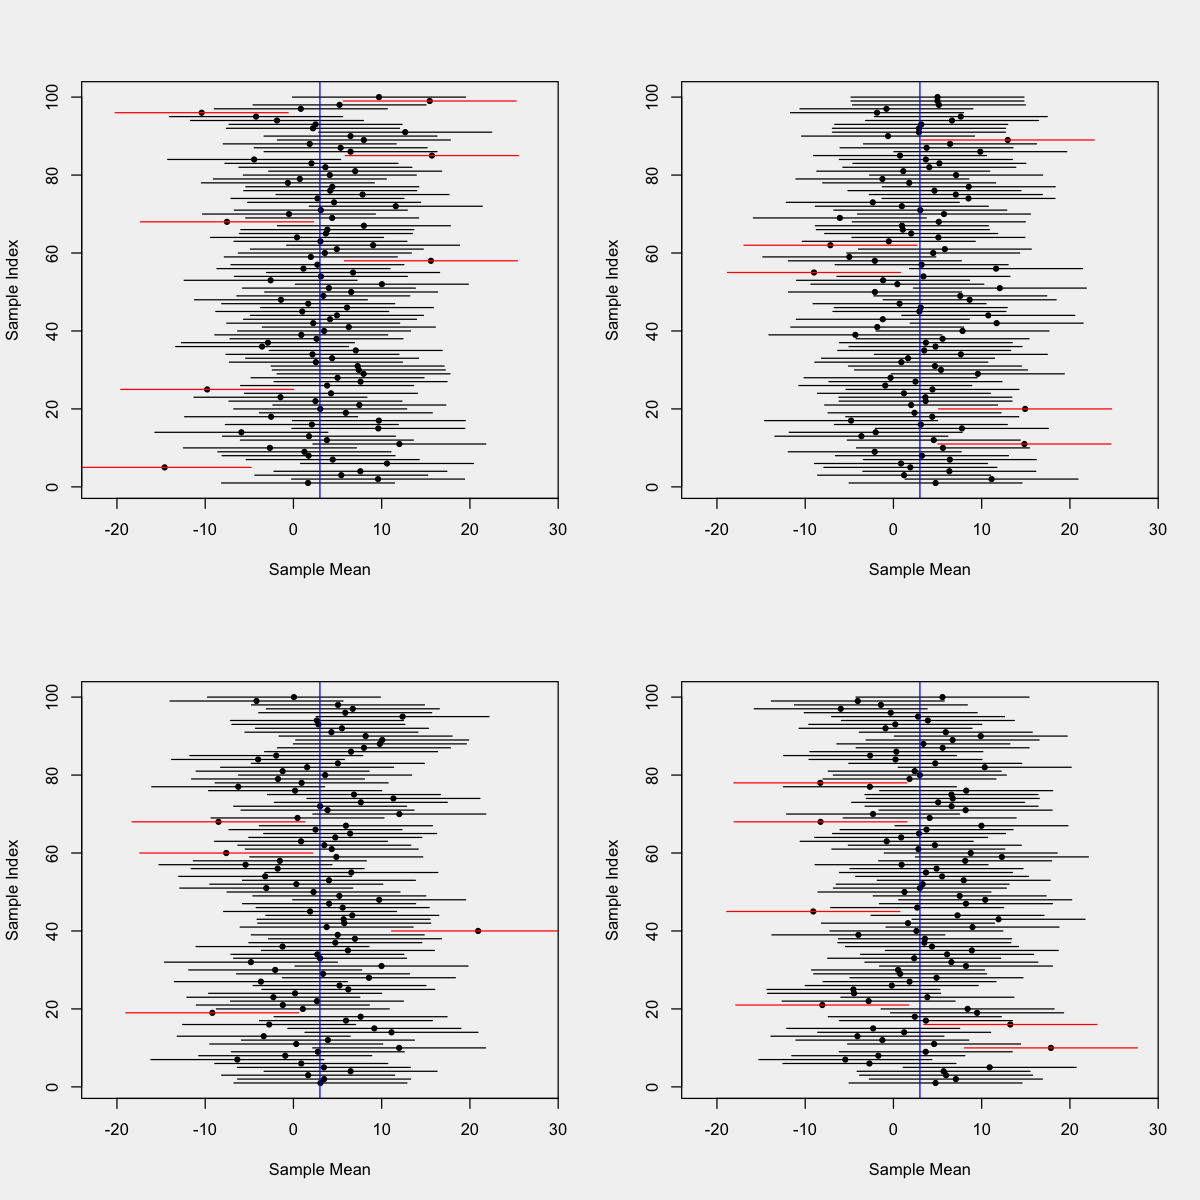

In [451]:
n = 1
n_samples = 100
k=0.1

options(repr.plot.width=10, repr.plot.height=10)
par(mfrow=c(1,2), bg='gray95')
layout(mat = matrix(c(1, 2, 3, 4), nrow = 2, ncol = 2),heights = c(15, 15), widths = c(10, 10))

for (j in 1:4) {
    plot_intervals(cis_contaminated_dist(n, n_samples, k))
}

### Figure 2.3: n=1; s_samples=100; k=0.5

Quick Summary:
- No. of intervels NOT containing mu: 11 
- Proportion of times the CI containing mu: 0.89 
-------
Quick Summary:
- No. of intervels NOT containing mu: 8 
- Proportion of times the CI containing mu: 0.92 
-------
Quick Summary:
- No. of intervels NOT containing mu: 12 
- Proportion of times the CI containing mu: 0.88 
-------
Quick Summary:
- No. of intervels NOT containing mu: 4 
- Proportion of times the CI containing mu: 0.96 
-------


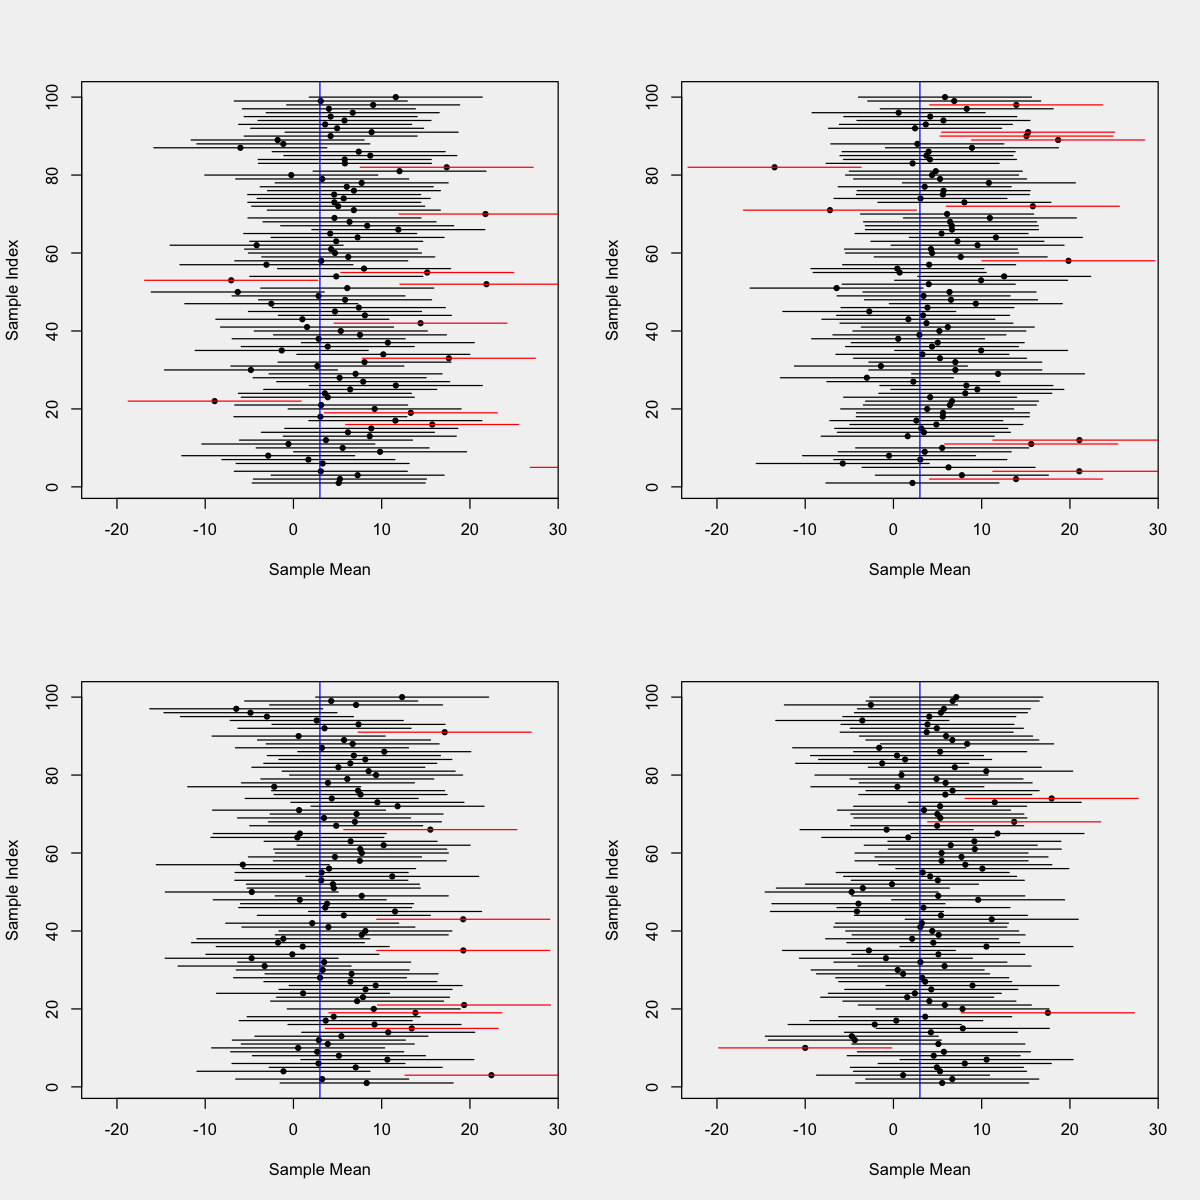

In [452]:
n = 1
n_samples = 100
k=0.5

options(repr.plot.width=10, repr.plot.height=10)
par(mfrow=c(1,2), bg='gray95')
layout(mat = matrix(c(1, 2, 3, 4), nrow = 2, ncol = 2),heights = c(15, 15), widths = c(10, 10))

for (j in 1:4) {
    plot_intervals(cis_contaminated_dist(n, n_samples, k))
}

### Figure 2.4: n=1; s_samples=100; k=0.9

Quick Summary:
- No. of intervels NOT containing mu: 13 
- Proportion of times the CI containing mu: 0.87 
-------
Quick Summary:
- No. of intervels NOT containing mu: 10 
- Proportion of times the CI containing mu: 0.9 
-------
Quick Summary:
- No. of intervels NOT containing mu: 13 
- Proportion of times the CI containing mu: 0.87 
-------
Quick Summary:
- No. of intervels NOT containing mu: 13 
- Proportion of times the CI containing mu: 0.87 
-------


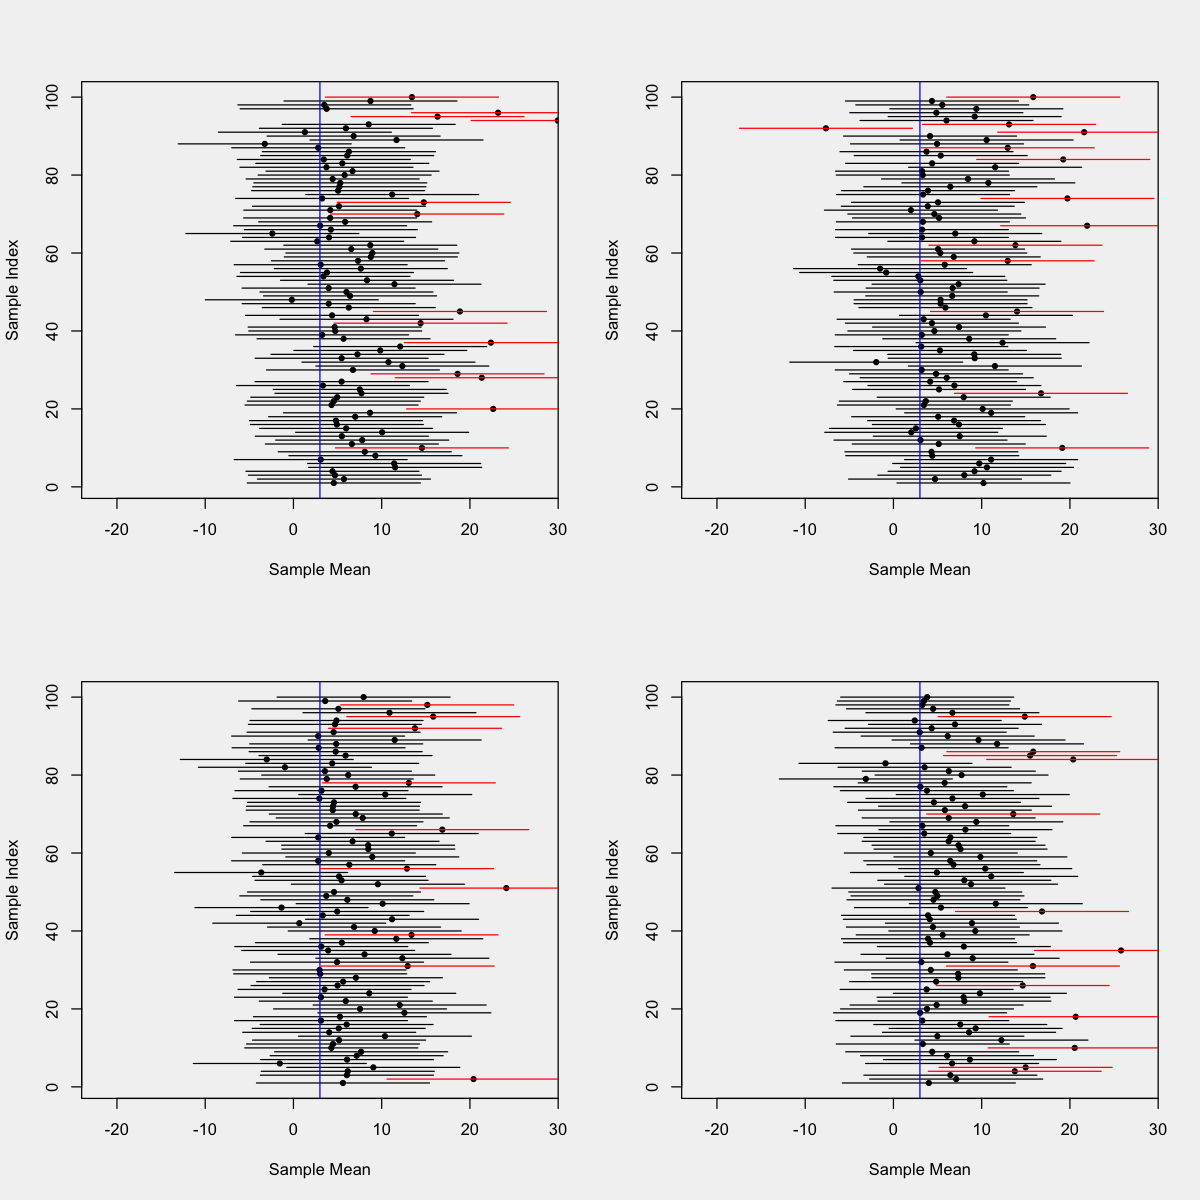

In [453]:
n = 1
n_samples = 100
k=0.9

options(repr.plot.width=10, repr.plot.height=10)
par(mfrow=c(1,2), bg='gray95')
layout(mat = matrix(c(1, 2, 3, 4), nrow = 2, ncol = 2),heights = c(15, 15), widths = c(10, 10))

for (j in 1:4) {
    plot_intervals(cis_contaminated_dist(n, n_samples, k))
}

### Figure 3.1: n=10; s_samples=100; k=0

Quick Summary:
- No. of intervels NOT containing mu: 7 
- Proportion of times the CI containing mu: 0.93 
-------
Quick Summary:
- No. of intervels NOT containing mu: 9 
- Proportion of times the CI containing mu: 0.91 
-------
Quick Summary:
- No. of intervels NOT containing mu: 8 
- Proportion of times the CI containing mu: 0.92 
-------
Quick Summary:
- No. of intervels NOT containing mu: 4 
- Proportion of times the CI containing mu: 0.96 
-------


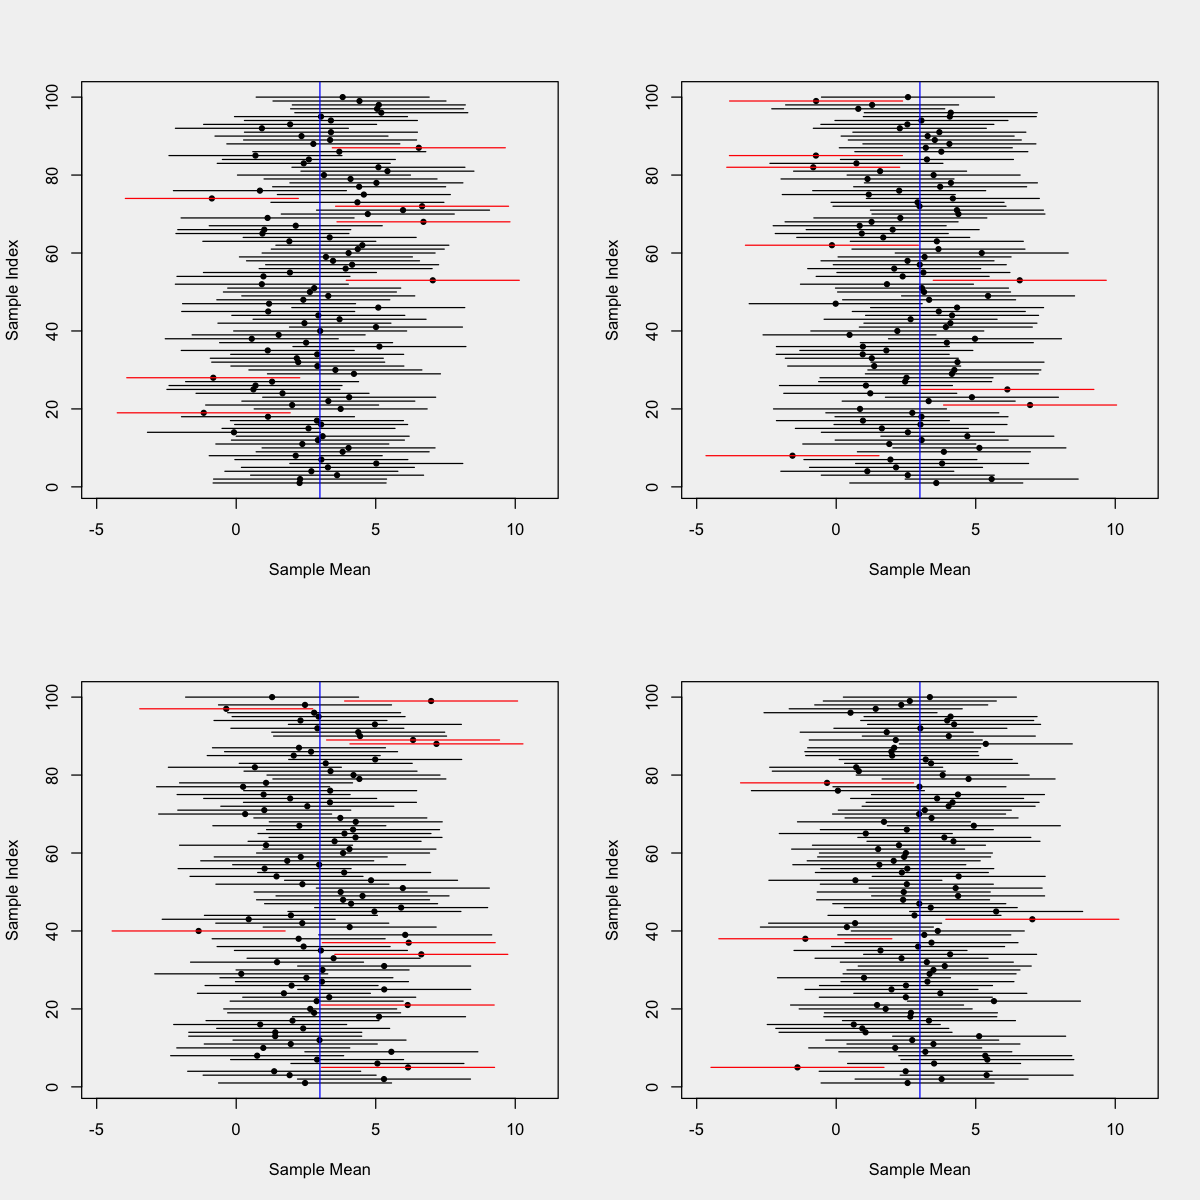

In [456]:
n = 10
n_samples = 100
k=0

options(repr.plot.width=10, repr.plot.height=10)
par(mfrow=c(1,2), bg='gray95')
layout(mat = matrix(c(1, 2, 3, 4), nrow = 2, ncol = 2),heights = c(15, 15), widths = c(10, 10))

for (j in 1:4) {
    plot_intervals(cis_contaminated_dist(n, n_samples, k))
}

### Figure 3.2: n=10; s_samples=100; k=0.1

Quick Summary:
- No. of intervels NOT containing mu: 6 
- Proportion of times the CI containing mu: 0.94 
-------
Quick Summary:
- No. of intervels NOT containing mu: 5 
- Proportion of times the CI containing mu: 0.95 
-------
Quick Summary:
- No. of intervels NOT containing mu: 6 
- Proportion of times the CI containing mu: 0.94 
-------
Quick Summary:
- No. of intervels NOT containing mu: 5 
- Proportion of times the CI containing mu: 0.95 
-------


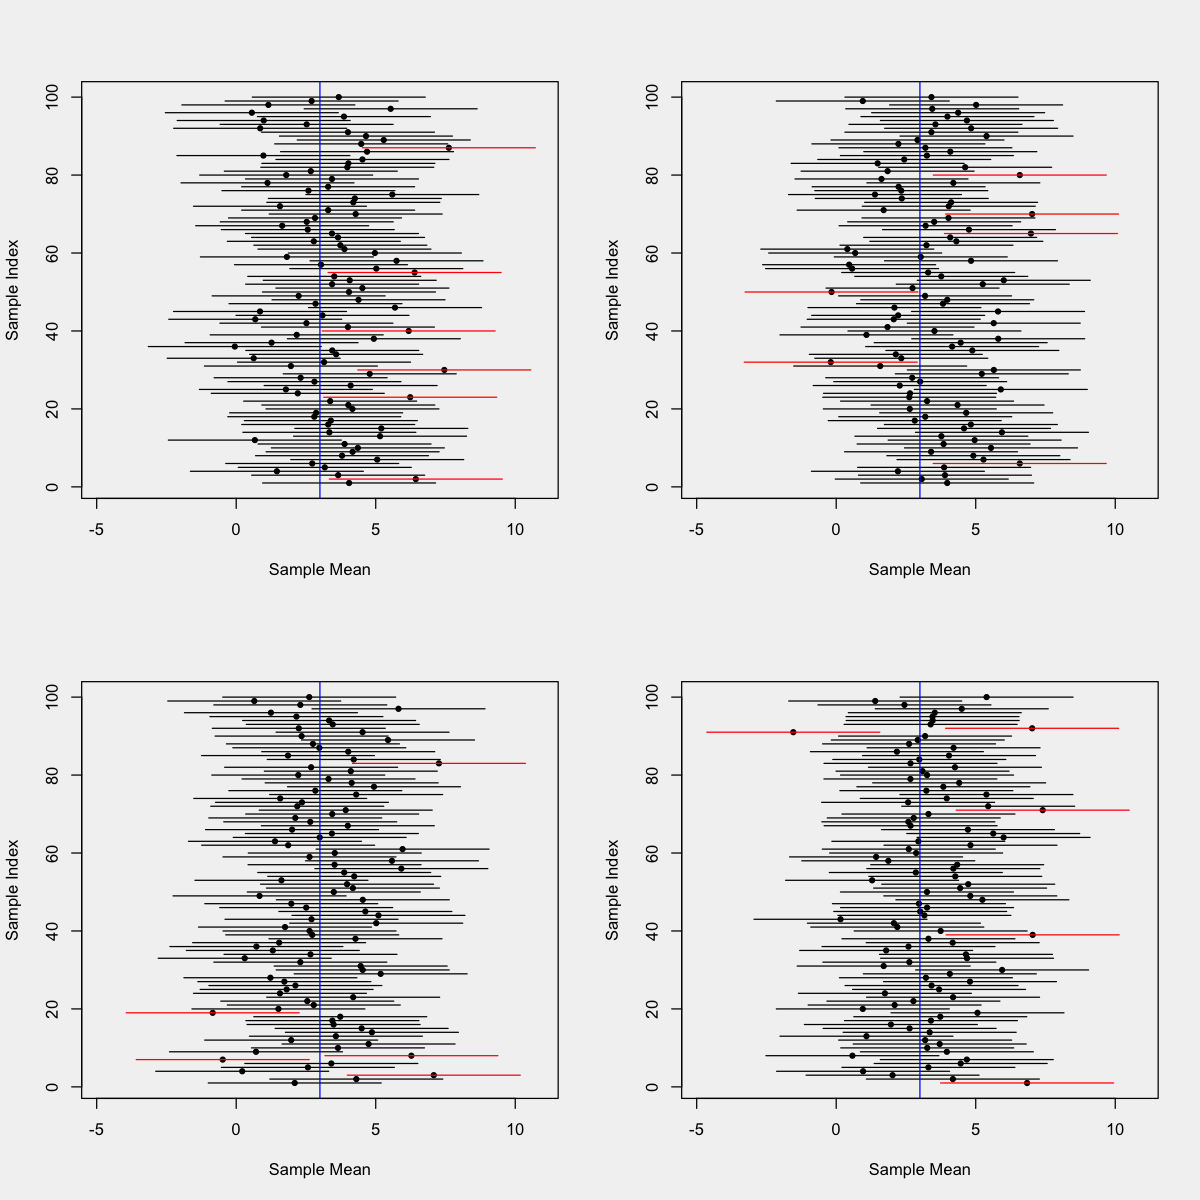

In [457]:
n = 10
n_samples = 100
k=0.1

options(repr.plot.width=10, repr.plot.height=10)
par(mfrow=c(1,2), bg='gray95')
layout(mat = matrix(c(1, 2, 3, 4), nrow = 2, ncol = 2),heights = c(15, 15), widths = c(10, 10))

for (j in 1:4) {
    plot_intervals(cis_contaminated_dist(n, n_samples, k))
}

### Figure 3.3: n=10; s_samples=100; k=0.5

Quick Summary:
- No. of intervels NOT containing mu: 30 
- Proportion of times the CI containing mu: 0.7 
-------
Quick Summary:
- No. of intervels NOT containing mu: 30 
- Proportion of times the CI containing mu: 0.7 
-------
Quick Summary:
- No. of intervels NOT containing mu: 33 
- Proportion of times the CI containing mu: 0.67 
-------
Quick Summary:
- No. of intervels NOT containing mu: 35 
- Proportion of times the CI containing mu: 0.65 
-------


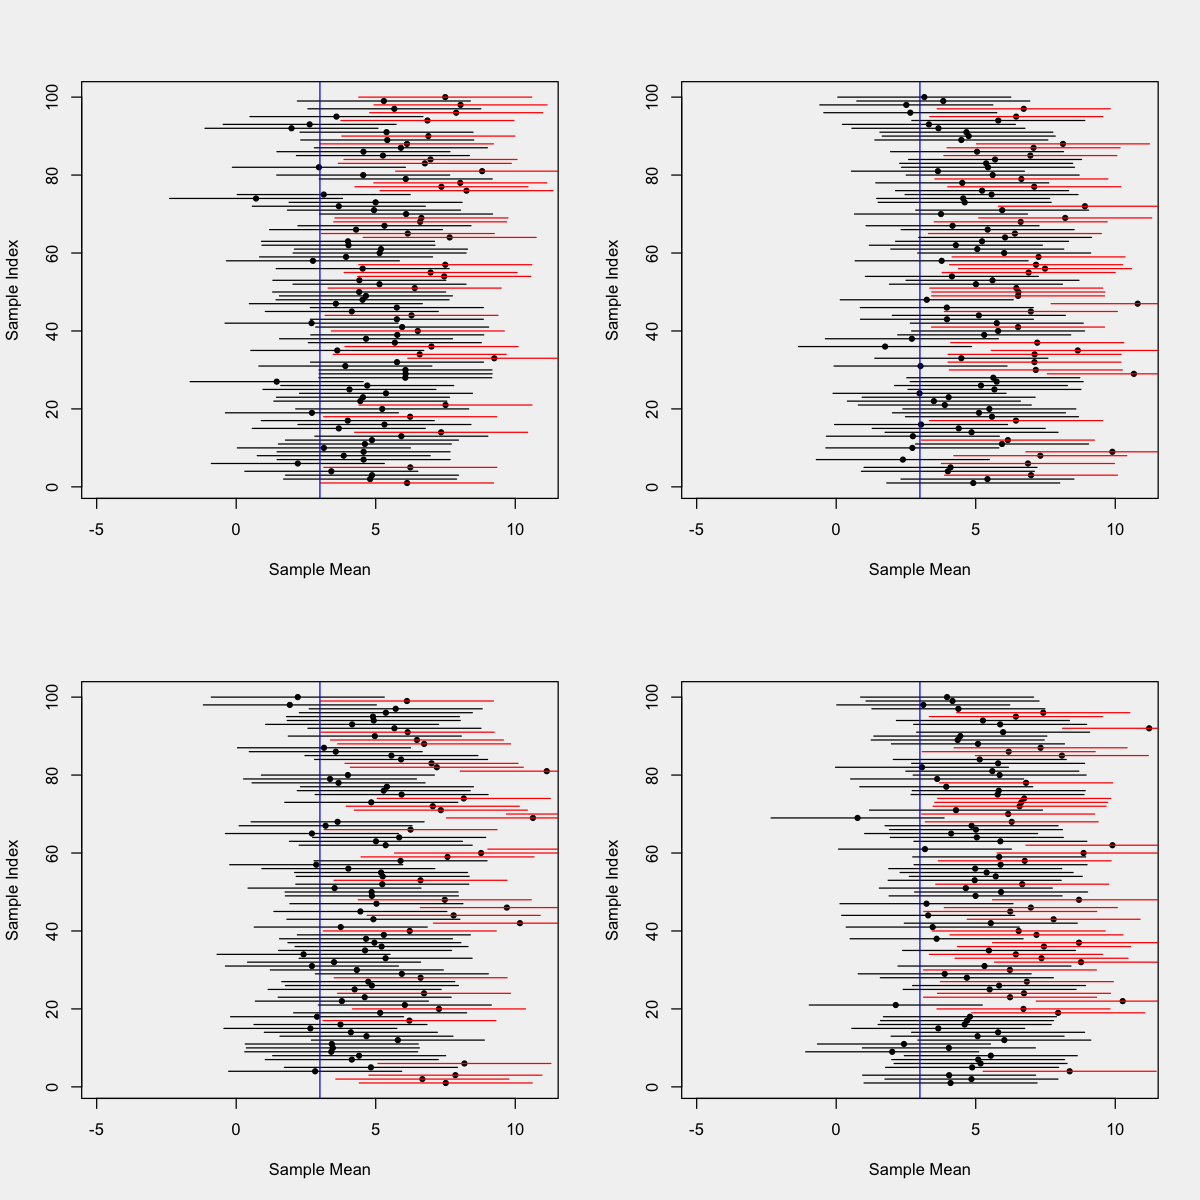

In [459]:
n = 10
n_samples = 100
k=0.5

options(repr.plot.width=10, repr.plot.height=10)

par(mfrow=c(1,2), bg='gray95')
layout(mat = matrix(c(1, 2, 3, 4), nrow = 2, ncol = 2),heights = c(15, 15), widths = c(10, 10))


plot_intervals(cis_contaminated_dist(n, n_samples, k))
plot_intervals(cis_contaminated_dist(n, n_samples, k))
plot_intervals(cis_contaminated_dist(n, n_samples, k))
plot_intervals(cis_contaminated_dist(n, n_samples, k))

### Figure 3.4: n=10; s_samples=100; k=0.9

Quick Summary:
- No. of intervels NOT containing mu: 78 
- Proportion of times the CI containing mu: 0.22 
-------
Quick Summary:
- No. of intervels NOT containing mu: 75 
- Proportion of times the CI containing mu: 0.25 
-------
Quick Summary:
- No. of intervels NOT containing mu: 73 
- Proportion of times the CI containing mu: 0.27 
-------
Quick Summary:
- No. of intervels NOT containing mu: 83 
- Proportion of times the CI containing mu: 0.17 
-------


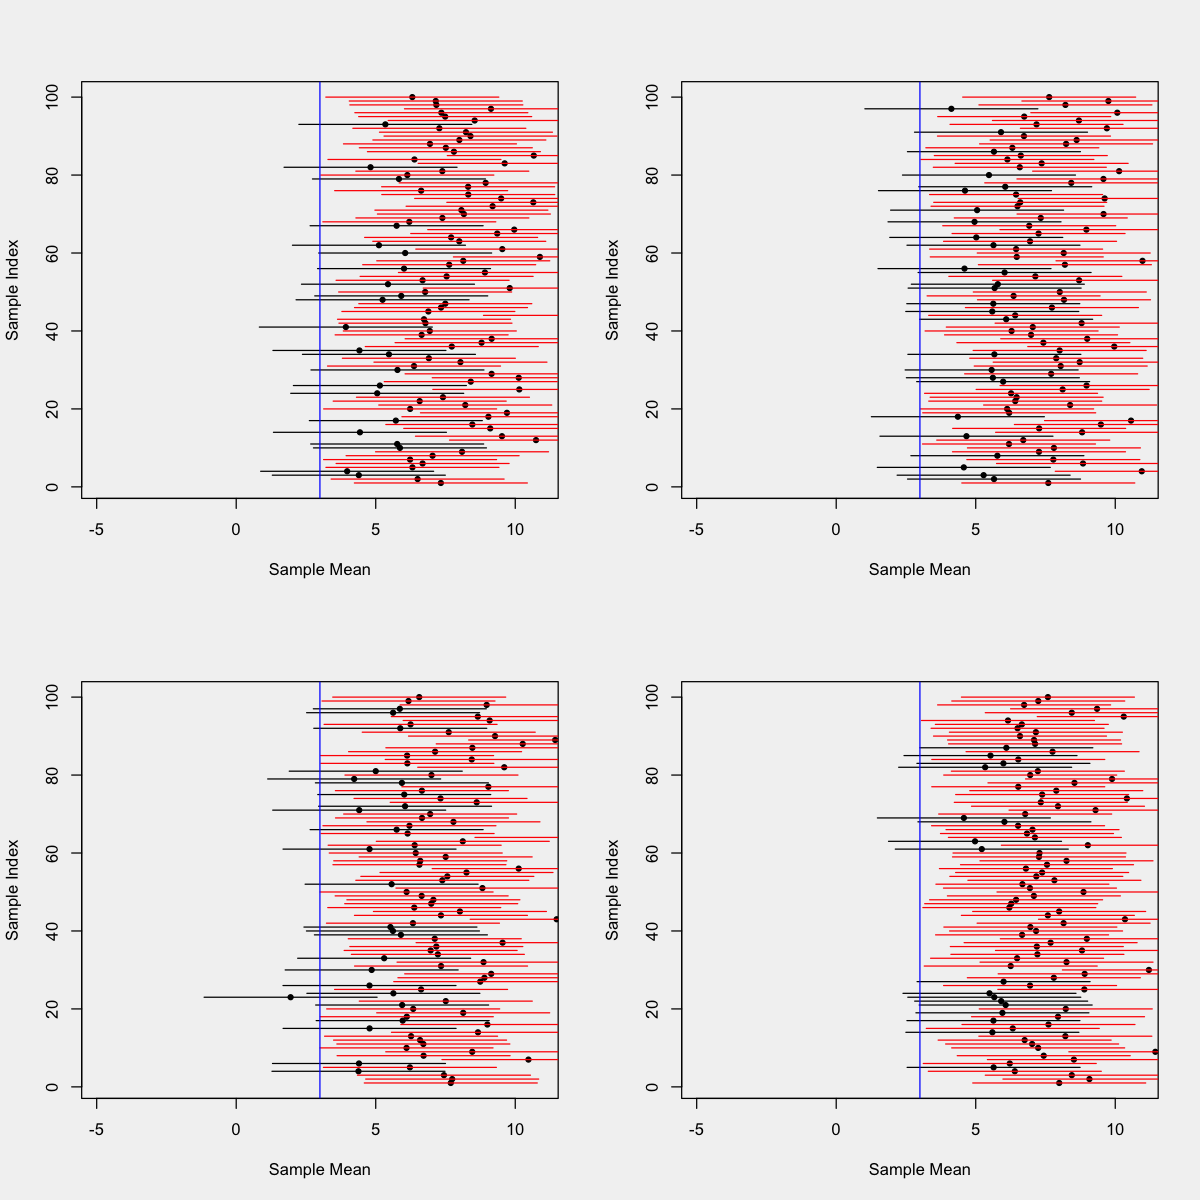

In [460]:
n = 10
n_samples = 100
k=0.9

options(repr.plot.width=10, repr.plot.height=10)

par(mfrow=c(1,2), bg='gray95')
layout(mat = matrix(c(1, 2, 3, 4), nrow = 2, ncol = 2),heights = c(15, 15), widths = c(10, 10))


plot_intervals(cis_contaminated_dist(n, n_samples, k))
plot_intervals(cis_contaminated_dist(n, n_samples, k))
plot_intervals(cis_contaminated_dist(n, n_samples, k))
plot_intervals(cis_contaminated_dist(n, n_samples, k))

### Figure 4.1: n=30; s_samples=100; k=0

Quick Summary:
- No. of intervels NOT containing mu: 1 
- Proportion of times the CI containing mu: 0.99 
-------
Quick Summary:
- No. of intervels NOT containing mu: 4 
- Proportion of times the CI containing mu: 0.96 
-------
Quick Summary:
- No. of intervels NOT containing mu: 3 
- Proportion of times the CI containing mu: 0.97 
-------
Quick Summary:
- No. of intervels NOT containing mu: 1 
- Proportion of times the CI containing mu: 0.99 
-------


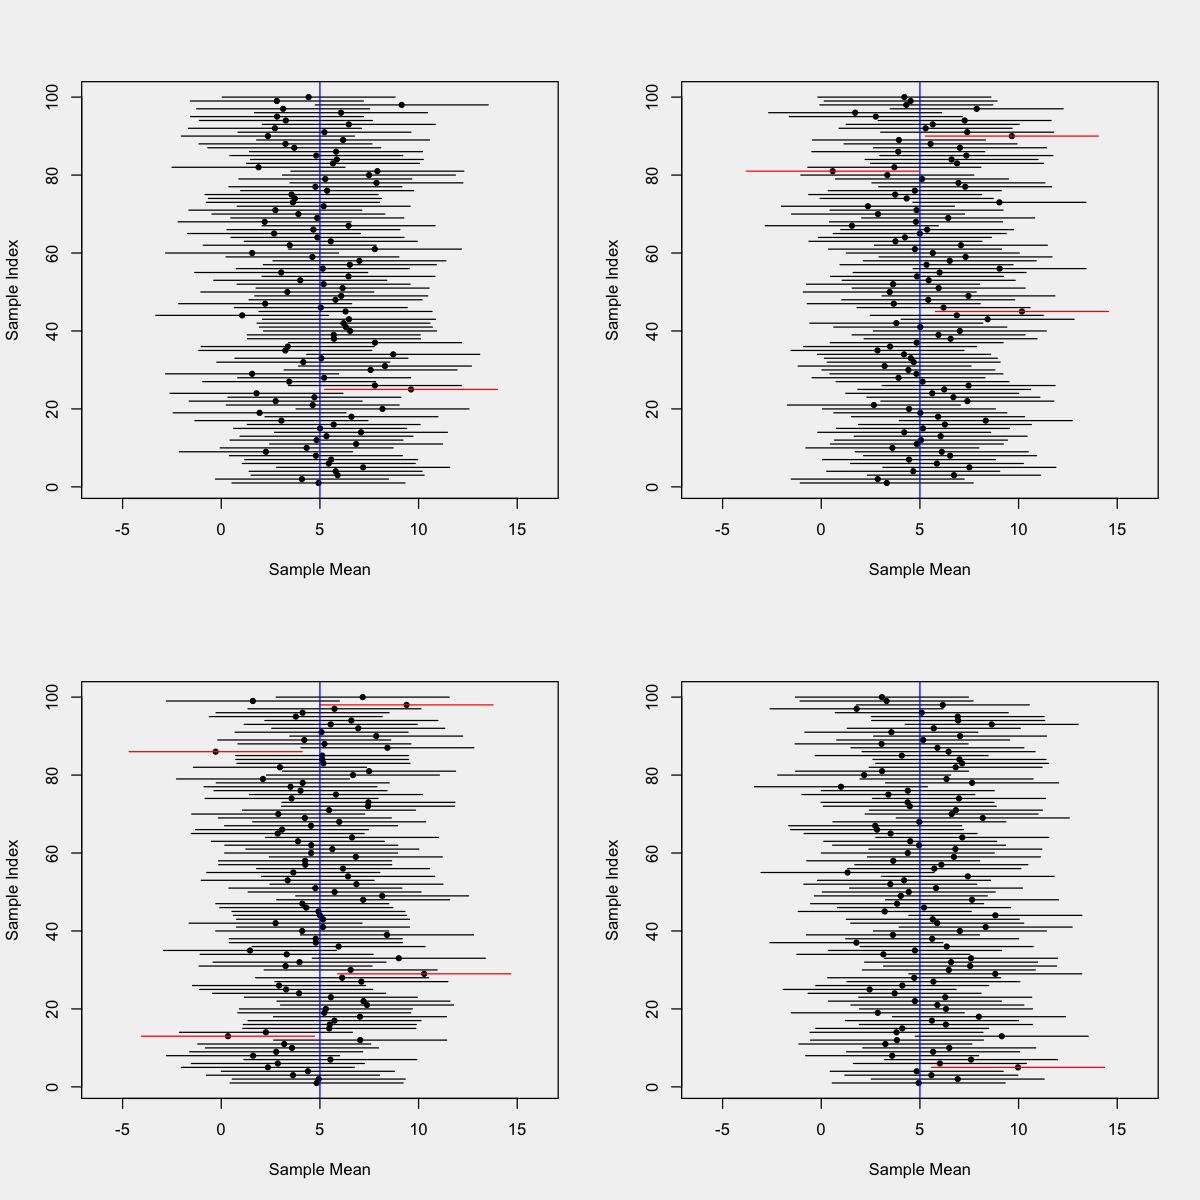

In [226]:
n = 30
n_samples = 100
k=0

options(repr.plot.width=10, repr.plot.height=10)

par(mfrow=c(1,2), bg='gray95')
layout(mat = matrix(c(1, 2, 3, 4), nrow = 2, ncol = 2),heights = c(15, 15), widths = c(10, 10))


plot_intervals(cis_contaminated_dist(n, n_samples, k))
plot_intervals(cis_contaminated_dist(n, n_samples, k))
plot_intervals(cis_contaminated_dist(n, n_samples, k))
plot_intervals(cis_contaminated_dist(n, n_samples, k))

### Figure 4.2: n=30; s_samples=100; k=0.1

Quick Summary:
- No. of intervels NOT containing mu: 3 
- Proportion of times the CI containing mu: 0.97 
-------
Quick Summary:
- No. of intervels NOT containing mu: 2 
- Proportion of times the CI containing mu: 0.98 
-------
Quick Summary:
- No. of intervels NOT containing mu: 2 
- Proportion of times the CI containing mu: 0.98 
-------
Quick Summary:
- No. of intervels NOT containing mu: 5 
- Proportion of times the CI containing mu: 0.95 
-------


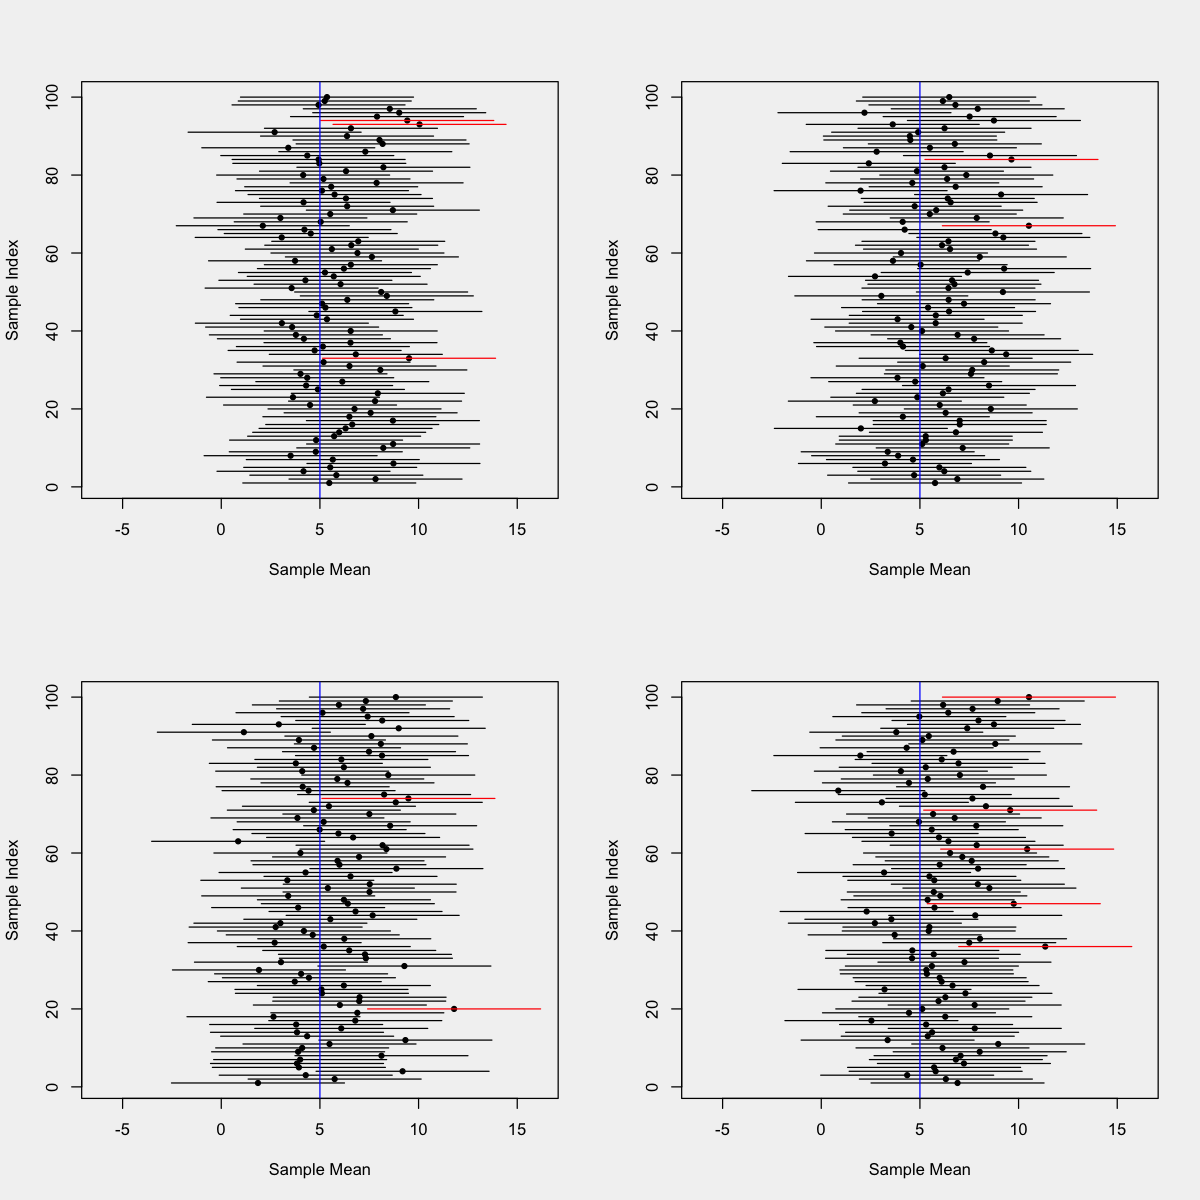

In [229]:
n = 30
n_samples = 100
k=0.1

options(repr.plot.width=10, repr.plot.height=10)

par(mfrow=c(1,2), bg='gray95')
layout(mat = matrix(c(1, 2, 3, 4), nrow = 2, ncol = 2),heights = c(15, 15), widths = c(10, 10))


plot_intervals(cis_contaminated_dist(n, n_samples, k))
plot_intervals(cis_contaminated_dist(n, n_samples, k))
plot_intervals(cis_contaminated_dist(n, n_samples, k))
plot_intervals(cis_contaminated_dist(n, n_samples, k))

### Figure 4.3: n=30; s_samples=100; k=0.5

Quick Summary:
- No. of intervels NOT containing mu: 66 
- Proportion of times the CI containing mu: 0.34 
-------
Quick Summary:
- No. of intervels NOT containing mu: 55 
- Proportion of times the CI containing mu: 0.45 
-------
Quick Summary:
- No. of intervels NOT containing mu: 54 
- Proportion of times the CI containing mu: 0.46 
-------
Quick Summary:
- No. of intervels NOT containing mu: 56 
- Proportion of times the CI containing mu: 0.44 
-------


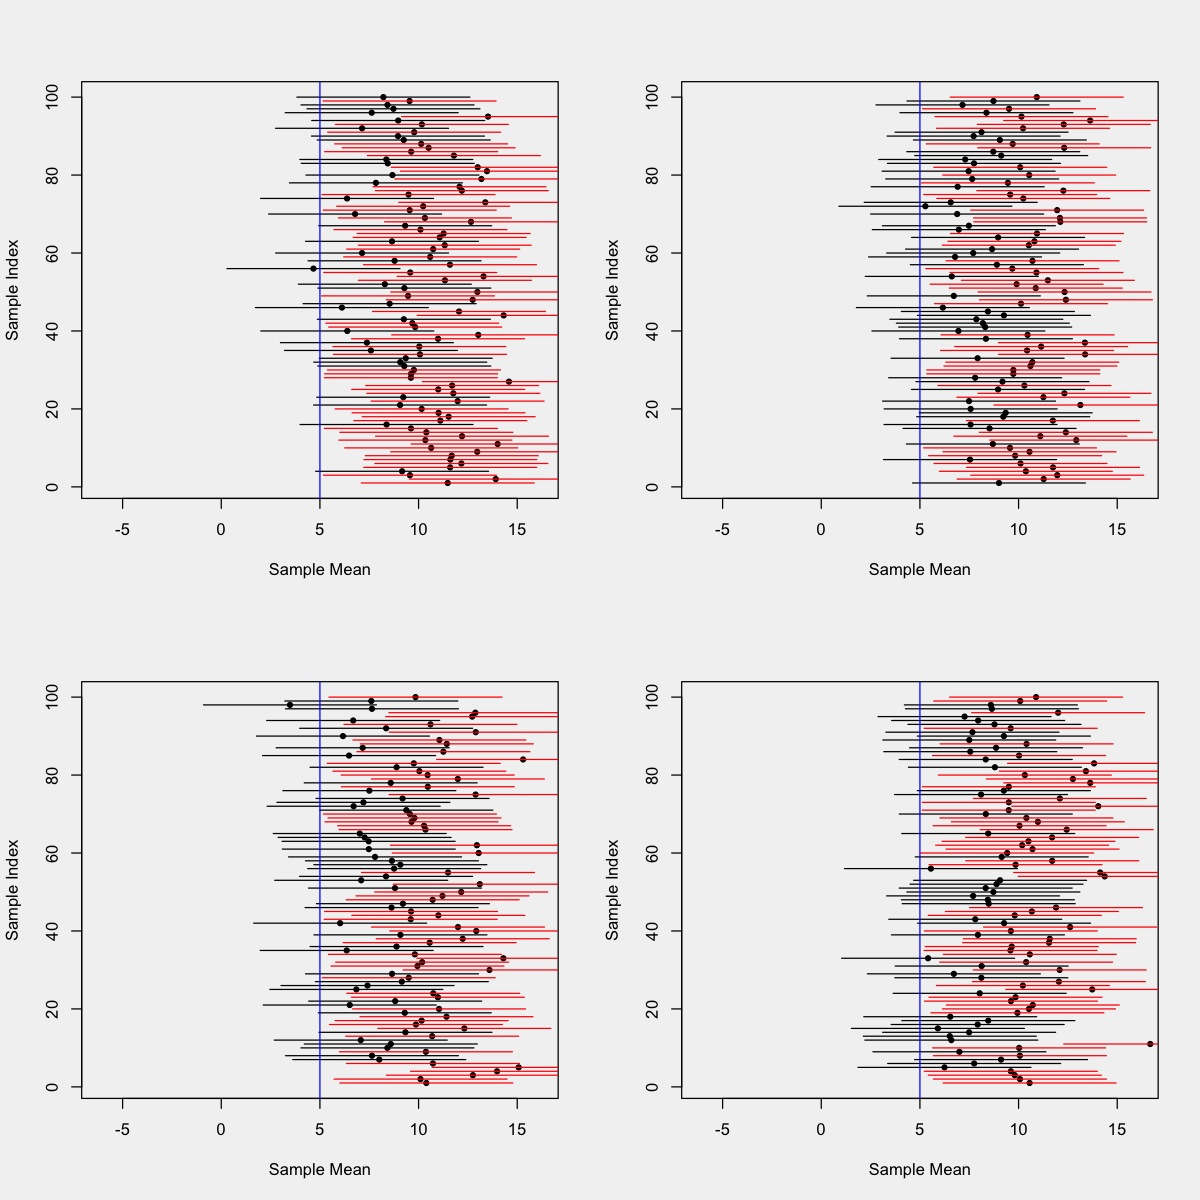

In [228]:
n = 30
n_samples = 100
k=0.5

options(repr.plot.width=10, repr.plot.height=10)

par(mfrow=c(1,2), bg='gray95')
layout(mat = matrix(c(1, 2, 3, 4), nrow = 2, ncol = 2),heights = c(15, 15), widths = c(10, 10))


plot_intervals(cis_contaminated_dist(n, n_samples, k))
plot_intervals(cis_contaminated_dist(n, n_samples, k))
plot_intervals(cis_contaminated_dist(n, n_samples, k))
plot_intervals(cis_contaminated_dist(n, n_samples, k))

### Figure 4.4: n=30; s_samples=100; k=0.9

Quick Summary:
- No. of intervels NOT containing mu: 100 
- Proportion of times the CI containing mu: 0 
-------
Quick Summary:
- No. of intervels NOT containing mu: 100 
- Proportion of times the CI containing mu: 0 
-------
Quick Summary:
- No. of intervels NOT containing mu: 99 
- Proportion of times the CI containing mu: 0.01 
-------
Quick Summary:
- No. of intervels NOT containing mu: 100 
- Proportion of times the CI containing mu: 0 
-------


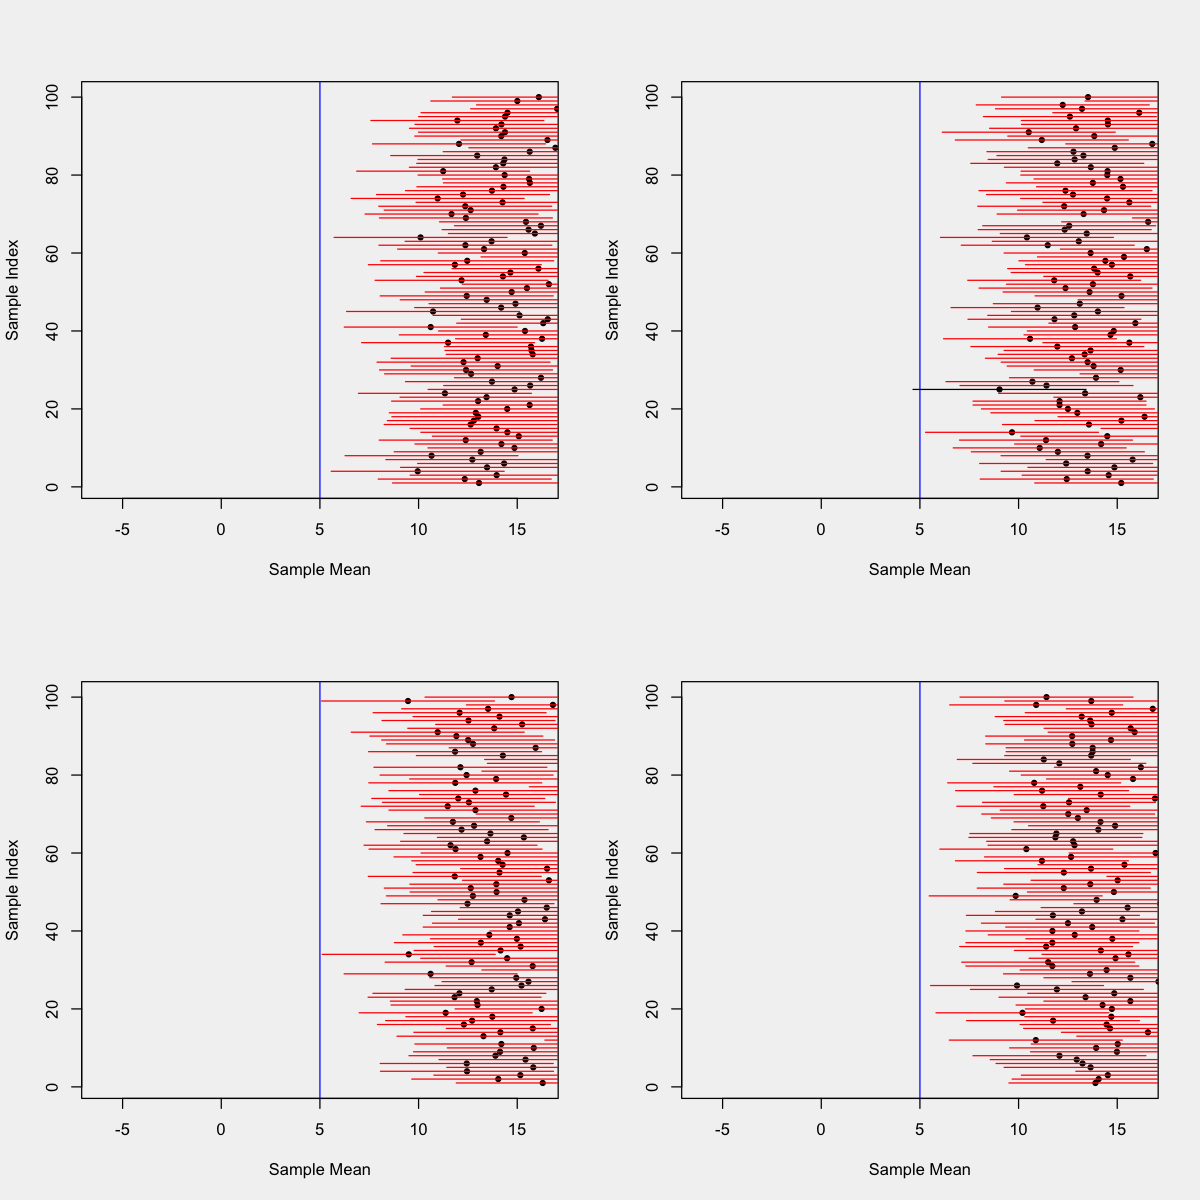

In [230]:
n = 30
n_samples = 100
k=0.9

options(repr.plot.width=10, repr.plot.height=10)

par(mfrow=c(1,2), bg='gray95')
layout(mat = matrix(c(1, 2, 3, 4), nrow = 2, ncol = 2),heights = c(15, 15), widths = c(10, 10))


plot_intervals(cis_contaminated_dist(n, n_samples, k))
plot_intervals(cis_contaminated_dist(n, n_samples, k))
plot_intervals(cis_contaminated_dist(n, n_samples, k))
plot_intervals(cis_contaminated_dist(n, n_samples, k))

### Figure 5.1: n=50; s_samples=100; k=0

Quick Summary:
- No. of intervels NOT containing mu: 0 
- Proportion of times the CI containing mu: 1 
-------
Quick Summary:
- No. of intervels NOT containing mu: 0 
- Proportion of times the CI containing mu: 1 
-------
Quick Summary:
- No. of intervels NOT containing mu: 0 
- Proportion of times the CI containing mu: 1 
-------
Quick Summary:
- No. of intervels NOT containing mu: 0 
- Proportion of times the CI containing mu: 1 
-------


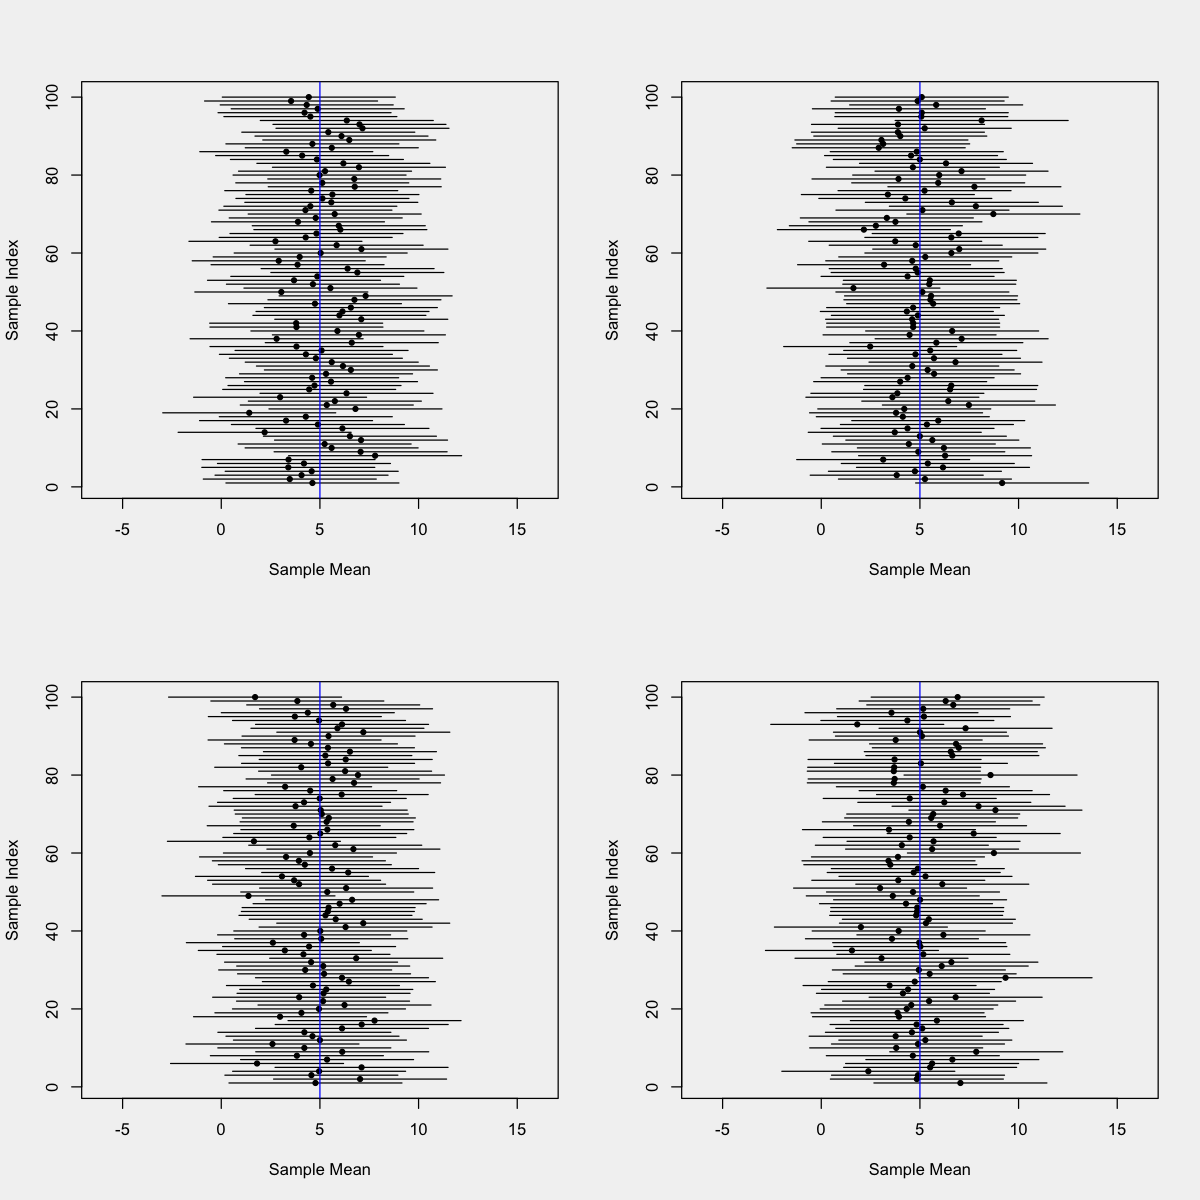

In [231]:
n = 50
n_samples = 100
k=0

options(repr.plot.width=10, repr.plot.height=10)

par(mfrow=c(1,2), bg='gray95')
layout(mat = matrix(c(1, 2, 3, 4), nrow = 2, ncol = 2),heights = c(15, 15), widths = c(10, 10))


plot_intervals(cis_contaminated_dist(n, n_samples, k))
plot_intervals(cis_contaminated_dist(n, n_samples, k))
plot_intervals(cis_contaminated_dist(n, n_samples, k))
plot_intervals(cis_contaminated_dist(n, n_samples, k))

### Figure 5.2: n=50; s_samples=100; k=0.1

Quick Summary:
- No. of intervels NOT containing mu: 1 
- Proportion of times the CI containing mu: 0.99 
-------
Quick Summary:
- No. of intervels NOT containing mu: 0 
- Proportion of times the CI containing mu: 1 
-------
Quick Summary:
- No. of intervels NOT containing mu: 1 
- Proportion of times the CI containing mu: 0.99 
-------
Quick Summary:
- No. of intervels NOT containing mu: 2 
- Proportion of times the CI containing mu: 0.98 
-------


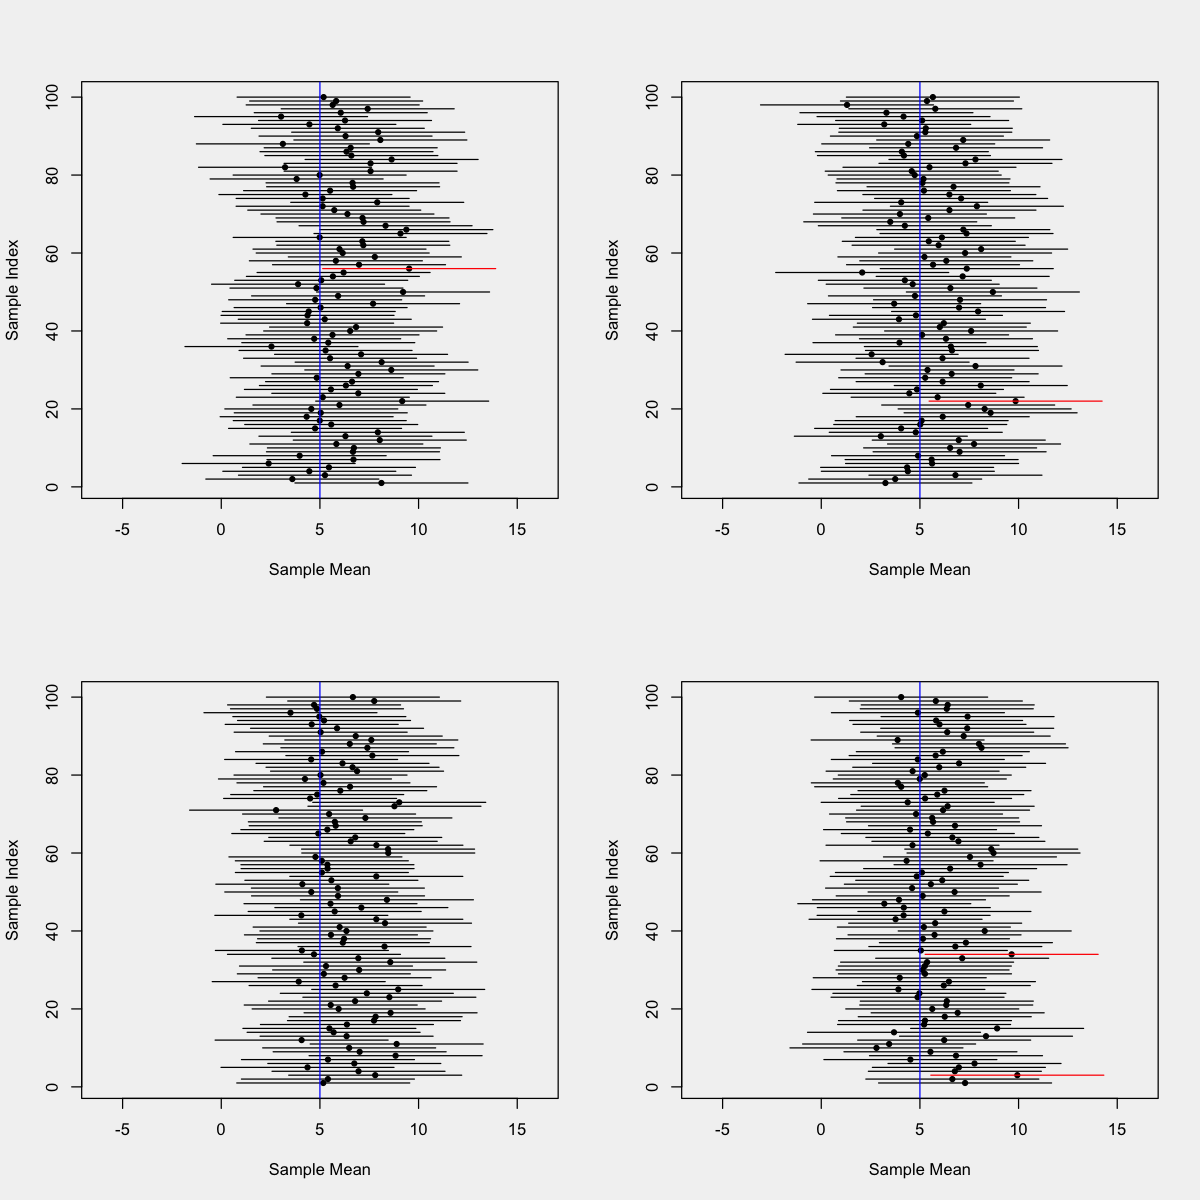

In [232]:
n = 50
n_samples = 100
k=0.1

options(repr.plot.width=10, repr.plot.height=10)

par(mfrow=c(1,2), bg='gray95')
layout(mat = matrix(c(1, 2, 3, 4), nrow = 2, ncol = 2),heights = c(15, 15), widths = c(10, 10))


plot_intervals(cis_contaminated_dist(n, n_samples, k))
plot_intervals(cis_contaminated_dist(n, n_samples, k))
plot_intervals(cis_contaminated_dist(n, n_samples, k))
plot_intervals(cis_contaminated_dist(n, n_samples, k))

### Figure 5.3: n=50; s_samples=100; k=0.5

Quick Summary:
- No. of intervels NOT containing mu: 66 
- Proportion of times the CI containing mu: 0.34 
-------
Quick Summary:
- No. of intervels NOT containing mu: 62 
- Proportion of times the CI containing mu: 0.38 
-------
Quick Summary:
- No. of intervels NOT containing mu: 61 
- Proportion of times the CI containing mu: 0.39 
-------
Quick Summary:
- No. of intervels NOT containing mu: 65 
- Proportion of times the CI containing mu: 0.35 
-------


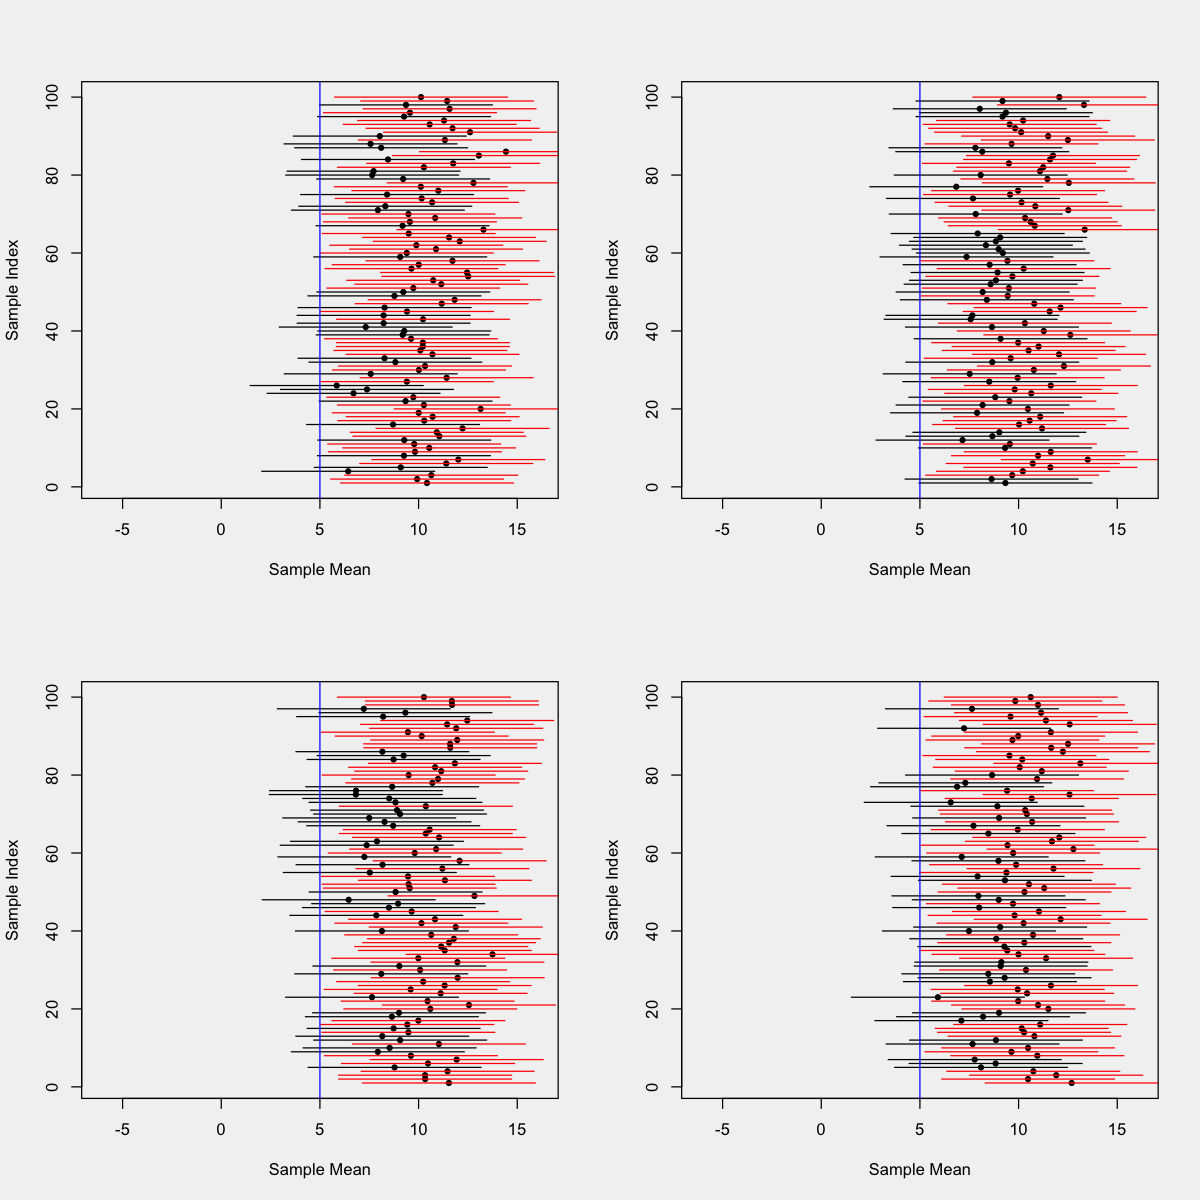

In [233]:
n = 50
n_samples = 100
k=0.5

options(repr.plot.width=10, repr.plot.height=10)

par(mfrow=c(1,2), bg='gray95')
layout(mat = matrix(c(1, 2, 3, 4), nrow = 2, ncol = 2),heights = c(15, 15), widths = c(10, 10))


plot_intervals(cis_contaminated_dist(n, n_samples, k))
plot_intervals(cis_contaminated_dist(n, n_samples, k))
plot_intervals(cis_contaminated_dist(n, n_samples, k))
plot_intervals(cis_contaminated_dist(n, n_samples, k))

### Figure 5.4: n=50; s_samples=100; k=0.9

Quick Summary:
- No. of intervels NOT containing mu: 100 
- Proportion of times the CI containing mu: 0 
-------
Quick Summary:
- No. of intervels NOT containing mu: 100 
- Proportion of times the CI containing mu: 0 
-------
Quick Summary:
- No. of intervels NOT containing mu: 100 
- Proportion of times the CI containing mu: 0 
-------
Quick Summary:
- No. of intervels NOT containing mu: 100 
- Proportion of times the CI containing mu: 0 
-------


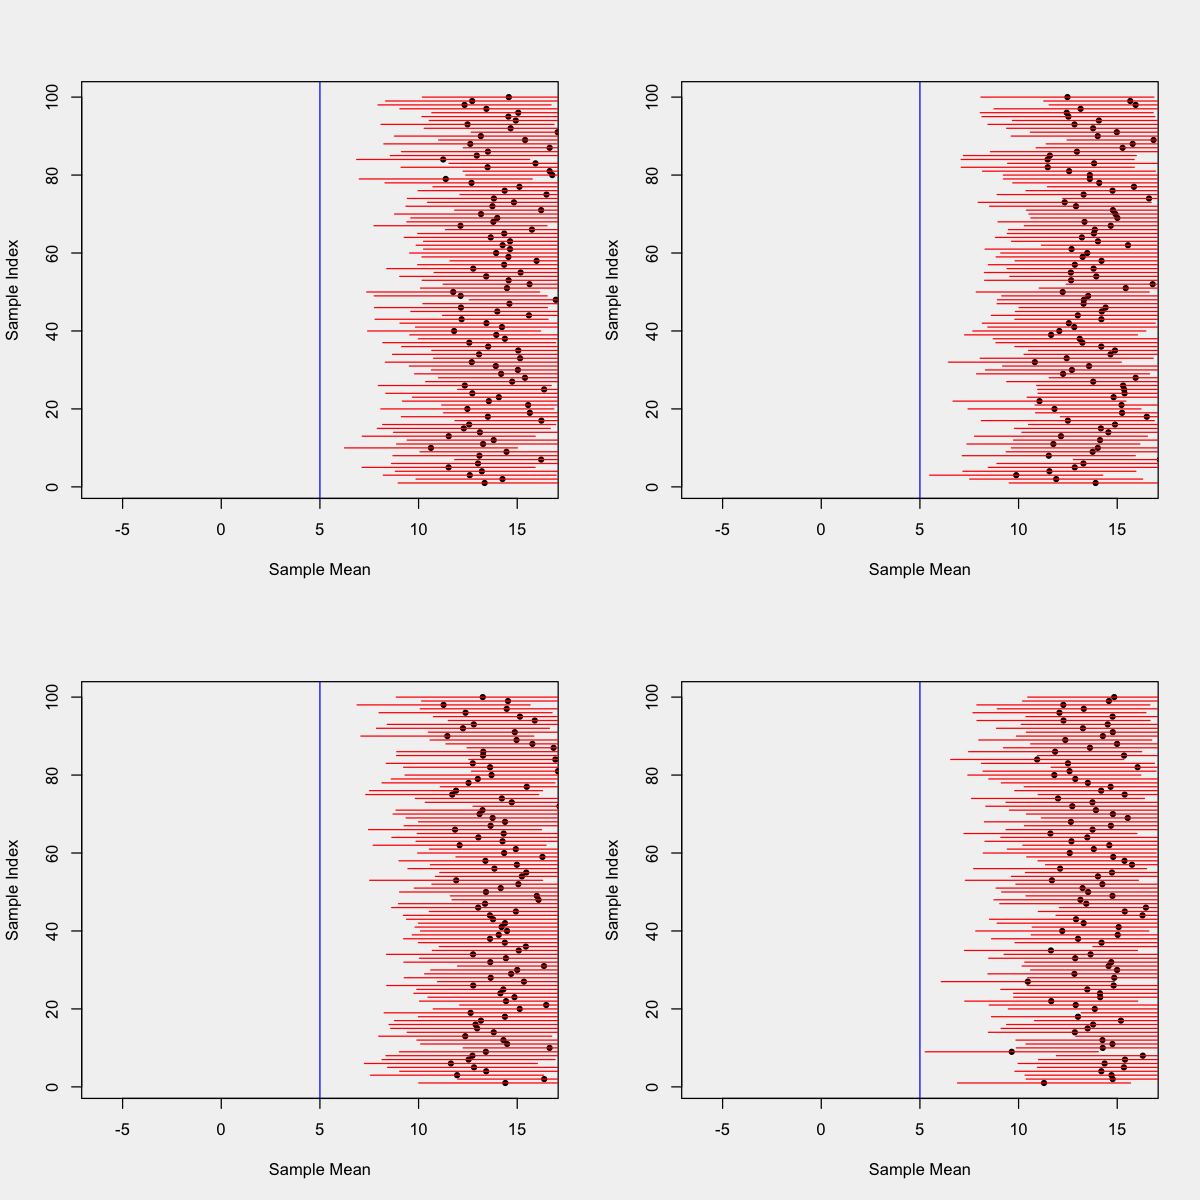

In [234]:
n = 50
n_samples = 100
k=0.9

options(repr.plot.width=10, repr.plot.height=10)

par(mfrow=c(1,2), bg='gray95')
layout(mat = matrix(c(1, 2, 3, 4), nrow = 2, ncol = 2),heights = c(15, 15), widths = c(10, 10))


plot_intervals(cis_contaminated_dist(n, n_samples, k))
plot_intervals(cis_contaminated_dist(n, n_samples, k))
plot_intervals(cis_contaminated_dist(n, n_samples, k))
plot_intervals(cis_contaminated_dist(n, n_samples, k))